## Q2.

**Start with m=5. Find the best 5 stocks to include in your portfolio and the weights of those 5
stocks, using the 2019 data. How well does this portfolio track the index in 2020? That is,
calculate $$\min \sum_{t=1}^{T} \left| q_t - \sum_{i=1}^{5} w_i r_{it} \right| $$
using the 2020 data (except wi is from your 2019 solution…).**

<div class="alert alert-block" style="background-color: green; color: white; text-align: center;"><span style="font-size: 16px;"> 
<strong>Stock Selection Model</strong>

<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 

<strong>Decision Variables:</strong><br>
    
<strong>$y_j$: A binary variable to indicate if stock $j$ from the index is included in the fund.</strong>

  - <strong>$y_j = 1$</strong> implies stock $j$ is included in the fund.
  - <strong>$y_j = 0$</strong> implies stock $j$ is not included in the fund.

<strong>$x_{ij}$: A binary decision variable that shows whether stock $j$ from the index is the optimal representative for stock $i$.</strong>

  - <strong>$x_{ij} = 1$</strong> means stock $j$ is the best representative for stock $i$.
  - <strong>$x_{ij} = 0$</strong> otherwise.

<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 

<strong>Objective function:</strong><br>
    
The aim is to maximize the overall similarity between all stocks and their respective representatives in the fund. This is done by utilizing the correlation, represented by $\rho_{ij}$, between the returns of stocks $i$ and $j$.

$$
\max \sum_{i=1}^n \sum_{j=1}^n \rho_{ij} x_{ij}
$$

<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 
    
<strong>Constraints:</strong><br>    

**Stock Limitation in the Fund:** The number of stocks chosen for the fund should be precisely $m$.

$$
\sum_{j=1}^n y_j = m
$$

**Unique Representation:** Every stock $i$ should have exactly one optimal representative $j$ from the index.

$$
\sum_{j=1}^n x_{ij} = 1, \quad \text{for } i = 1, 2, \ldots, n
$$

**Representation Validity:** A stock $i$ can only be represented by another stock $j$ if stock $j$ is actually present in the fund.

$$ x_{ij} \leq y_j, \quad \text{for } i, j = 1, 2, \ldots, n
$$

**Binary Constraints:** Both $y_j$ and $x_{ij}$ are binary variables, which means they can only take the values of 0 or 1.

$$
y_j, x_{ij} \in \{0, 1\}
$$


In [1]:
import pandas as pd

# Load the data
stocks_2019 = pd.read_csv('stocks2019.csv', parse_dates=[0], index_col=0)
stocks_2020 = pd.read_csv('stocks2020.csv', parse_dates=[0], index_col=0)

# Calculate daily returns for the 2019 data
returns_2019 = stocks_2019.pct_change().dropna()

# Exclude the index returns column to compute the correlation matrix only for the stocks
stock_returns_2019 = returns_2019.drop(columns=['NDX'])

# Calculate the correlation matrix
corr_matrix = stock_returns_2019.corr()

corr_matrix

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,...,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,...,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,...,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,...,0.257143,0.408936,0.350581,0.191489,0.522423,0.192720,0.416396,0.289908,0.047947,0.200356
ALGN,0.216280,0.363370,0.344252,0.332433,1.000000,0.248747,0.250316,0.399281,0.264599,0.328280,...,0.175957,0.128559,0.360886,0.251855,0.334978,0.219595,0.308968,0.284407,0.088059,0.253934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.218149,0.228106,0.281950,0.192720,0.219595,0.232900,0.230603,0.288168,0.194490,0.347861,...,0.257049,0.145330,0.195475,0.126118,0.214585,1.000000,0.211641,0.296309,-0.130798,0.276643
WDAY,0.311659,0.650430,0.407626,0.416396,0.308968,0.379493,0.371826,0.424748,0.211712,0.351734,...,0.235045,0.269545,0.569672,0.401476,0.376047,0.211641,1.000000,0.315699,0.209240,0.254117
WDC,0.303077,0.361516,0.438892,0.289908,0.284407,0.328619,0.322110,0.419620,0.172623,0.602935,...,0.377215,0.126463,0.331916,0.308558,0.314773,0.296309,0.315699,1.000000,-0.076115,0.516958
XEL,0.043389,0.207403,0.017283,0.047947,0.088059,0.059930,0.052570,0.076724,0.137857,-0.047259,...,-0.172752,0.074686,0.280371,0.407770,0.191667,-0.130798,0.209240,-0.076115,1.000000,-0.117552


In [2]:
len(returns_2019)

250

In [3]:
from gurobipy import Model, GRB

n = corr_matrix.shape[0]  # number of stocks

#Set value of m as 5
m=5

# Initialize model
mod1 = Model()

# Add decision variables
y = mod1.addVars(n, vtype=GRB.BINARY, name="y")
x = mod1.addVars(n, n, vtype=GRB.BINARY, name="x")

# Objective function
mod1.setObjective(sum(corr_matrix.iloc[i, j] * x[i, j] for i in range(n) for j in range(n)), GRB.MAXIMIZE)

# Constraints
mod1.addConstr(sum(y[j] for j in range(n)) == m)  # Exactly 5 stocks are chosen

for i in range(n):
    mod1.addConstr(sum(x[i, j] for j in range(n)) == 1)  # Every stock has a representative
    
    for j in range(n):
        mod1.addConstr(x[i, j] <= y[j])  # Stock i is represented by stock j only if j is chosen

# Solve model
mod1.optimize()

# Extract chosen stocks
chosen_stocks = [stock for stock, var in y.items() if var.x > 0.5]

# Extract stock names from indices
chosen_stock_names = [corr_matrix.columns[index] for index in chosen_stocks]

print("Chosen stock names:", chosen_stock_names)



Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-17
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10101 rows, 10100 columns and 30100 nonzeros
Model fingerprint: 0x73067c3b
Variable types: 0 continuous, 10100 integer (10100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 27.8849725
Presolve time: 0.04s
Presolved: 10101 rows, 10100 columns, 30100 nonzeros
Variable types: 0 continuous, 10100 integer (10100 binary)
Found heuristic solution: objective 45.1363632

Root relaxation: objective 5.483991e+01, 801 iterations, 0.02 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

<div class="alert alert-block" style="background-color: green; color: white; text-align: center;"><span style="font-size: 16px;"> 
<strong>Weight Allocation Model</strong>

<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 

<strong>Decision Variables:</strong><br>
    
To determine portfolio weights, the objective is to match the returns of an index as closely as possible. Let's define the terms:

- $r_{it}$: **Return of stock $i$ at time period $t$, where stock $i$ is one of the selected stocks.**
- $q_t$: **Return of the index at time $t$.**
- $w_i$: **Weight of stock $i$ in the portfolio.**


<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 
    
<strong>Objective function:</strong><br>
    
The objective function seeks to minimize the discrepancy between the portfolio's returns and the index's returns over a specified time horizon. Specifically, it quantifies the difference between the index return $q_t$ at each time $t$ and the weighted sum of returns $r_{it}$ of the selected stocks, with $w_i$ representing the weight of stock $i$ in the portfolio. The aim is to determine the optimal weights $w_i$ for each chosen stock that allows the portfolio to closely track or mimic the index's performance.

 $$\min \sum_{t=1}^{T} \left| q_t - \sum_{i=1}^{m} w_i r_{it} \right| $$



<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 
    
<strong>Constraints:</strong><br>   
    
**Sum of Weights:** 
Portfolio weights should sum up to 1 $$ \sum_{i=1}^{m} w_i = 1 $$

**Non-negative Weights:**
Portfolio weights should be non-negative $$ w_i \geq 0 \quad \forall i $$

Given that the absolute value function is non-linear, this optimization problem needs to be linearized for solution methods such as linear programming.

To handle the absolute value in the objective function, we introduce an auxiliary variable $z_t$ for each time period $t$, such that $z_t$ represents the absolute difference:

$$ z_t \geq q_t - \sum_{i=1}^{m} w_i r_{it} $$
$$ z_t \geq - \left( q_t - \sum_{i=1}^{m} w_i r_{it} \right) $$

By introducing $z_t$ and using these constraints, the absolute value can be represented linearly, thus making the problem suitable for linear programming solvers.

In [4]:
# Calculate the index returns
index_returns_2019 = returns_2019['NDX']

# Only keep the chosen stocks
chosen_returns_2019 = stock_returns_2019[chosen_stock_names]

# Linear program for weights
mod2 = Model()

# Decision variables for weights
weights = mod2.addVars(chosen_stock_names, name="weights", lb=0)

# Auxiliary variables to linearize absolute value
z = mod2.addVars(index_returns_2019.index, name="z")

# Objective function
mod2.setObjective(sum(z[t] for t in index_returns_2019.index), GRB.MINIMIZE)

# Constraints
for t in index_returns_2019.index:
    mod2.addConstr(z[t] >= index_returns_2019.loc[t] - sum(weights[s] * chosen_returns_2019.loc[t, s] for s in chosen_stock_names))
    mod2.addConstr(z[t] >= sum(weights[s] * chosen_returns_2019.loc[t, s] for s in chosen_stock_names) - index_returns_2019.loc[t])
    
mod2.addConstr(sum(weights[s] for s in chosen_stock_names) == 1)  # Weights sum up to 1

# Solve the model
mod2.optimize()

# Extract portfolio weights
portfolio_weights = {s: round(weights[s].x, 2) for s in chosen_stock_names}

print("Portfolio Weights:", portfolio_weights)


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 501 rows, 255 columns and 2983 nonzeros
Model fingerprint: 0xd81e5032
Coefficient statistics:
  Matrix range     [8e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-05, 1e+00]
Presolve removed 9 rows and 1 columns
Presolve time: 0.00s
Presolved: 492 rows, 254 columns, 2931 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1013190e-03   2.411508e+00   0.000000e+00      0s
     272    7.8917828e-01   0.000000e+00   0.000000e+00      0s

Solved in 272 iterations and 0.01 seconds (0.01 work units)
Optimal objective  7.891782825e-01
Portfolio Weights: {'LBTYK': 0.05, 'MXIM': 0.21, 'MSFT': 0.58, 'VRTX': 0.07, 'XEL': 0.09}


<div class="alert alert-block" style="background-color: green; color: white; text-align: center;"><span style="font-size: 16px;"> 
<strong>Tracking Error</strong>

In [5]:
# Calculate the daily returns for the NASDAQ-100 index in 2020
index_returns_2020 = stocks_2020['NDX'].pct_change().dropna()

# Calculate the daily returns for all component stocks in 2020
stock_returns_2020 = stocks_2020.drop(columns='NDX').pct_change().dropna()

# Only keep the chosen stocks for 2020
chosen_returns_2020 = stock_returns_2020[chosen_stock_names]

# Calculate the tracking error
tracking_error = sum(
    abs(index_returns_2020[t] - sum(portfolio_weights[s] * chosen_returns_2020.loc[t, s] for s in chosen_stock_names))
    for t in index_returns_2020.index
)

print("Tracking Error for 2020:", round(tracking_error,2))


Tracking Error for 2020: 1.11


## Q3.

**Redo step (2) with m = 10, 20, …, 90, 100 (obviously when m=100 you don’t need to solve for
which stocks to include, because they’re all included). Analyze the performance of the portfolio
for each value of m. How does the performance change? Is there some value of m, where there
are diminishing returns of including more stocks in the portfolio? You can also look at the in-
sample performance. That is, evaluate the performance in 2019 using 2019 portfolio
construction and 2019 data. How is performance in 2019 different than performance in 2020?
Why is it different? Be sure to write your code so that if there are more or fewer than 100
stocks in the csv file it stops at the right place.**

In [6]:
start_value = 10
end_value = 100
step_value = 10

values_of_m = list(range(start_value, end_value + 1, step_value))

values_of_m.insert(0, 5)
results = {}

for m_value in values_of_m:
    # Initialize model
    mod3 = Model()
    y = mod3.addVars(n, vtype=GRB.BINARY, name="y")
    x = mod3.addVars(n, n, vtype=GRB.BINARY, name="x")

    # Objective function
    mod3.setObjective(sum(corr_matrix.iloc[i, j] * x[i, j] for i in range(n) for j in range(n)), GRB.MAXIMIZE)

    # Constraints
    mod3.addConstr(sum(y[j] for j in range(n)) == m_value)  # Choose m_value stocks

    for i in range(n):
        mod3.addConstr(sum(x[i, j] for j in range(n)) == 1)  # Every stock has a representative
        for j in range(n):
            mod3.addConstr(x[i, j] <= y[j])  # Stock i is represented by stock j only if j is chosen

    # Solve the model
    mod3.optimize()

    # Extract chosen stocks
    chosen_stocks = [stock for stock, var in y.items() if var.x > 0.5]
    chosen_stock_names = [corr_matrix.columns[index] for index in chosen_stocks]

    # Only keep the chosen stocks for 2019
    chosen_returns_2019 = stock_returns_2019[chosen_stock_names]

    # Linear program for weights
    mod4 = Model()
    weights = mod4.addVars(chosen_stock_names, name="weights", lb=0)
    z = mod4.addVars(index_returns_2019.index, name="z")

    # Objective function and constraints
    mod4.setObjective(sum(z[t] for t in index_returns_2019.index), GRB.MINIMIZE)
    for t in index_returns_2019.index:
        mod4.addConstr(z[t] >= index_returns_2019.loc[t] - sum(weights[s] * chosen_returns_2019.loc[t, s] for s in chosen_stock_names))
        mod4.addConstr(z[t] >= sum(weights[s] * chosen_returns_2019.loc[t, s] for s in chosen_stock_names) - index_returns_2019.loc[t])
    mod4.addConstr(sum(weights[s] for s in chosen_stock_names) == 1)

    # Solve the model
    mod4.optimize()

    # Extract portfolio weights
    portfolio_weights = {s: weights[s].x for s in chosen_stock_names}

    # Only keep the chosen stocks for 2020
    chosen_returns_2020 = stock_returns_2020[chosen_stock_names]

    # Calculate the tracking error for 2020
    tracking_error_2020 = sum(
        abs(index_returns_2020[t] - sum(portfolio_weights[s] * chosen_returns_2020.loc[t, s] for s in chosen_stock_names))
        for t in index_returns_2020.index
    )
    
    # Calculate the tracking error for 2019
    tracking_error_2019 = sum(
        abs(index_returns_2019[t] - sum(portfolio_weights[s] * chosen_returns_2019.loc[t, s] for s in chosen_stock_names))
        for t in index_returns_2019.index
    )

    # Store results for the current m value
    results[m_value] = {
        'Chosen Stocks': chosen_stock_names,
        'Portfolio Weights': portfolio_weights,
        'Tracking Error 2020': tracking_error_2020,
        'Tracking Error 2019': tracking_error_2019
    }

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10101 rows, 10100 columns and 30100 nonzeros
Model fingerprint: 0x73067c3b
Variable types: 0 continuous, 10100 integer (10100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 27.8849725
Presolve time: 0.04s
Presolved: 10101 rows, 10100 columns, 30100 nonzeros
Variable types: 0 continuous, 10100 integer (10100 binary)
Found heuristic solution: objective 45.1363632

Root relaxation: objective 5.483991e+01, 801 iterations, 0.02 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      54.8399065   54.83991 

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 501 rows, 280 columns and 15470 nonzeros
Model fingerprint: 0xb5590848
Coefficient statistics:
  Matrix range     [3e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-05, 1e+00]
Presolve time: 0.00s
Presolved: 501 rows, 280 columns, 15470 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.148649e+00   0.000000e+00      0s
     401    4.1801476e-01   0.000000e+00   0.000000e+00      0s

Solved in 401 iterations and 0.02 seconds (0.04 work units)
Optimal objective  4.180147550e-01
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10101 rows, 10100 columns and 30100 nonzeros
M


Optimal solution found (tolerance 1.00e-04)
Best objective 9.206240170167e+01, best bound 9.206240170167e+01, gap 0.0000%
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 501 rows, 320 columns and 35426 nonzeros
Model fingerprint: 0xf4c93345
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-05, 1e+00]
Presolve time: 0.01s
Presolved: 501 rows, 320 columns, 35426 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.047964e+00   0.000000e+00      0s
     615    1.6982372e-01   0.000000e+00   0.000000e+00      0s

Solved in 615 iterations and 0.04 seconds (0.12 work units)
Optimal objective  1.698237183e-01
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physic

In [7]:
# Define ANSI escape codes for text styling
bold = "\033[1m"
reset = "\033[0m"
colors = ["\033[91m", "\033[92m", "\033[93m", "\033[94m", "\033[95m"]

for i, (m_value, data) in enumerate(results.items()):
    color = colors[i % len(colors)]  # Cycle through colors for headings
    print(f"{bold}{color}Results for m = {m_value}:{reset}\n")
    print(f"{bold}Chosen Stocks:{reset} {data['Chosen Stocks']}\n")
    rounded_portfolio_weights = {stock: round(weight, 2) for stock, weight in data['Portfolio Weights'].items()}
    print(f"{bold}Portfolio Weights:{reset} {rounded_portfolio_weights}\n")
    print(f"{bold}Tracking Error for 2020:{reset} {round(data['Tracking Error 2020'], 2)}\n")
    print(f"{bold}Tracking Error for 2019:{reset} {round(data['Tracking Error 2019'], 2)}\n")


Results for m = 5:

Chosen Stocks: ['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL']

Portfolio Weights: {'LBTYK': 0.05, 'MXIM': 0.21, 'MSFT': 0.58, 'VRTX': 0.07, 'XEL': 0.09}

Tracking Error for 2020: 1.11

Tracking Error for 2019: 0.79

Results for m = 10:

Chosen Stocks: ['ATVI', 'ALGN', 'EXPE', 'KHC', 'LBTYK', 'MXIM', 'MSFT', 'ROST', 'VRTX', 'XEL']

Portfolio Weights: {'ATVI': 0.04, 'ALGN': 0.02, 'EXPE': 0.02, 'KHC': 0.02, 'LBTYK': 0.04, 'MXIM': 0.16, 'MSFT': 0.49, 'ROST': 0.09, 'VRTX': 0.05, 'XEL': 0.06}

Tracking Error for 2020: 1.1

Tracking Error for 2019: 0.7

Results for m = 20:

Chosen Stocks: ['ATVI', 'ALGN', 'GOOGL', 'ANSS', 'ADP', 'BIIB', 'CMCSA', 'DLTR', 'EXPE', 'JD', 'KHC', 'LBTYK', 'MXIM', 'MSFT', 'MRNA', 'PCAR', 'PDD', 'ULTA', 'VRTX', 'XEL']

Portfolio Weights: {'ATVI': 0.02, 'ALGN': 0.01, 'GOOGL': 0.2, 'ANSS': 0.07, 'ADP': 0.02, 'BIIB': 0.01, 'CMCSA': 0.05, 'DLTR': 0.02, 'EXPE': 0.01, 'JD': 0.04, 'KHC': 0.04, 'LBTYK': 0.0, 'MXIM': 0.11, 'MSFT': 0.24, 'MRNA': 0.01, 'PCAR': 0.0

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 5:</strong><br>

<strong>Chosen Stocks:</strong> ['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL']
<br>
    
<strong>Portfolio Weights:</strong> {'LBTYK': 0.05, 'MXIM': 0.21, 'MSFT': 0.58, 'VRTX': 0.07, 'XEL': 0.09}

<strong>Tracking Error for 2020:</strong> 1.11

<strong>Tracking Error for 2019:</strong> 0.79

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 10:</strong><br>

<strong>Chosen Stocks:</strong> ['ATVI', 'ALGN', 'EXPE', 'KHC', 'LBTYK', 'MXIM', 'MSFT', 'ROST', 'VRTX', 'XEL']<br>
    
<strong>Portfolio Weights:</strong> {'ATVI': 0.04, 'ALGN': 0.02, 'EXPE': 0.02, 'KHC': 0.02, 'LBTYK': 0.04, 'MXIM': 0.16, 'MSFT': 0.49, 'ROST': 0.09, 'VRTX': 0.05, 'XEL': 0.06}   

<strong>Tracking Error for 2020:</strong> 1.1

<strong>Tracking Error for 2019:</strong> 0.7

<div class="alert alert-block alert-success"><span style="font-size: 16px;">
<strong>Results for m = 20:</strong><br>

<strong>Chosen Stocks:</strong> ['ATVI', 'ALGN', 'GOOGL', 'ANSS', 'ADP', 'BIIB', 'CMCSA', 'DLTR', 'EXPE', 'JD', 'KHC', 'LBTYK', 'MXIM', 'MSFT', 'MRNA', 'PCAR', 'PDD', 'ULTA', 'VRTX', 'XEL']<br>
    
<strong>Portfolio Weights:</strong>{'ATVI': 0.02, 'ALGN': 0.01, 'GOOGL': 0.2, 'ANSS': 0.07, 'ADP': 0.02, 'BIIB': 0.01, 'CMCSA': 0.05, 'DLTR': 0.02, 'EXPE': 0.01, 'JD': 0.04, 'KHC': 0.04, 'LBTYK': 0.0, 'MXIM': 0.11, 'MSFT': 0.24, 'MRNA': 0.01, 'PCAR': 0.04, 'PDD': 0.01, 'ULTA': 0.01, 'VRTX': 0.03, 'XEL': 0.04} <br>   

<strong>Tracking Error for 2020:</strong> 0.9<br>

<strong>Tracking Error for 2019:</strong> 0.48

<div class="alert alert-block alert-success"><span style="font-size: 16px;">
    
<strong>Results for m = 30:</strong> <br>

<strong>Chosen Stocks:</strong> ['ATVI', 'ADBE', 'GOOGL', 'AMAT', 'ADP', 'BIIB', 'CTXS', 'CMCSA', 'DXCM', 'DOCU', 'DLTR', 'EXPE', 'ILMN', 'JD', 'KHC', 'LBTYK', 'LULU', 'MXIM', 'MSFT', 'MRNA', 'MNST', 'PCAR', 'PEP', 'PDD', 'QCOM', 'TMUS', 'TSLA', 'ULTA', 'VRTX', 'XEL']<br>

<strong>Portfolio Weights:</strong>{'ATVI': 0.02, 'ADBE': 0.03, 'GOOGL': 0.18, 'AMAT': 0.04, 'ADP': 0.0, 'BIIB': 0.0, 'CTXS': 0.0, 'CMCSA': 0.05, 'DXCM': 0.02, 'DOCU': 0.0, 'DLTR': 0.01, 'EXPE': 0.03, 'ILMN': 0.0, 'JD': 0.03, 'KHC': 0.01, 'LBTYK': 0.02, 'LULU': 0.02, 'MXIM': 0.07, 'MSFT': 0.25, 'MRNA': 0.0, 'MNST': 0.0, 'PCAR': 0.04, 'PEP': 0.05, 'PDD': 0.0, 'QCOM': 0.02, 'TMUS': 0.0, 'TSLA': 0.03, 'ULTA': 0.01, 'VRTX': 0.04, 'XEL': 0.01}<br>
    
<strong>Tracking Error for 2020:</strong> 0.77<br>

<strong>Tracking Error for 2019:</strong> 0.42    

<div class="alert alert-block alert-success"><span style="font-size: 16px;">
<strong>Results for m = 40:</strong><br>

<strong>Chosen Stocks:</strong> ['ATVI', 'ADBE', 'ALGN', 'GOOGL', 'AMGN', 'AMAT', 'ADP', 'BIIB', 'CERN', 'CHKP', 'CTSH', 'CMCSA', 'CPRT', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EXPE', 'ILMN', 'JD', 'KHC', 'LBTYA', 'LULU', 'MXIM', 'MELI', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'ORLY', 'PCAR', 'PDD', 'QCOM', 'SIRI', 'TMUS', 'TSLA', 'ULTA', 'VRTX', 'WBA', 'XEL']<br>
    
<strong>Portfolio Weights:</strong>{'ATVI': 0.03, 'ADBE': 0.03, 'ALGN': 0.01, 'GOOGL': 0.13, 'AMGN': 0.05, 'AMAT': 0.03, 'ADP': 0.0, 'BIIB': 0.0, 'CERN': 0.0, 'CHKP': 0.02, 'CTSH': 0.05, 'CMCSA': 0.03, 'CPRT': 0.0, 'DXCM': 0.01, 'DOCU': 0.0, 'DLTR': 0.01, 'EBAY': 0.04, 'EXPE': 0.01, 'ILMN': 0.0, 'JD': 0.03, 'KHC': 0.01, 'LBTYA': 0.0, 'LULU': 0.01, 'MXIM': 0.07, 'MELI': 0.01, 'MSFT': 0.22, 'MRNA': 0.01, 'MDLZ': 0.02, 'MNST': 0.01, 'ORLY': 0.0, 'PCAR': 0.01, 'PDD': 0.01, 'QCOM': 0.02, 'SIRI': 0.04, 'TMUS': 0.02, 'TSLA': 0.03, 'ULTA': 0.01, 'VRTX': 0.01, 'WBA': 0.01, 'XEL': 0.0}<br>


<strong>Tracking Error for 2020:</strong> 0.79<br>

<strong>Tracking Error for 2019:</strong> 0.37

<div class="alert alert-block alert-success"><span style="font-size: 16px;">
    
<strong>Results for m = 50:</strong>

<strong>Chosen Stocks:</strong> ['ATVI', 'ADBE', 'ALXN', 'ALGN', 'GOOGL', 'AMGN', 'AMAT', 'ADP', 'BIIB', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EXPE', 'GILD', 'ILMN', 'JD', 'KHC', 'LBTYA', 'LULU', 'MXIM', 'MELI', 'MSFT', 'MRNA', 'MNST', 'NFLX', 'ORLY', 'PCAR', 'PEP', 'PDD', 'QCOM', 'ROST', 'SGEN', 'SIRI', 'SBUX', 'TMUS', 'TSLA', 'ULTA', 'VRTX', 'WBA', 'XEL']<br>
    
<strong>Portfolio Weights:</strong>{'ATVI': 0.02, 'ADBE': 0.03, 'ALXN': 0.01, 'ALGN': 0.01, 'GOOGL': 0.13, 'AMGN': 0.03, 'AMAT': 0.04, 'ADP': 0.0, 'BIIB': 0.0, 'CDW': 0.02, 'CERN': 0.0, 'CHTR': 0.04, 'CHKP': 0.02, 'CTXS': 0.0, 'CTSH': 0.04, 'CMCSA': 0.02, 'CPRT': 0.0, 'COST': 0.03, 'DXCM': 0.01, 'DOCU': 0.0, 'DLTR': 0.01, 'EBAY': 0.03, 'EXPE': 0.02, 'GILD': 0.0, 'ILMN': 0.01, 'JD': 0.03, 'KHC': 0.01, 'LBTYA': 0.0, 'LULU': 0.01, 'MXIM': 0.05, 'MELI': 0.01, 'MSFT': 0.17, 'MRNA': 0.01, 'MNST': 0.01, 'NFLX': 0.03, 'ORLY': 0.0, 'PCAR': 0.02, 'PEP': 0.03, 'PDD': 0.01, 'QCOM': 0.02, 'ROST': 0.0, 'SGEN': 0.01, 'SIRI': 0.03, 'SBUX': 0.0, 'TMUS': 0.0, 'TSLA': 0.02, 'ULTA': 0.01, 'VRTX': 0.0, 'WBA': 0.0, 'XEL': 0.0}<br>

<strong>Tracking Error for 2020:</strong> 0.77<br>

<strong>Tracking Error for 2019:</strong> 0.33
    

<div class="alert alert-block alert-success"><span style="font-size: 16px;">
<strong>Results for m = 60:</strong> <br>

<strong>Chosen Stocks:</strong> ['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'AMGN', 'AMAT', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'GILD', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'KHC', 'LBTYA', 'LULU', 'MAR', 'MXIM', 'MELI', 'MRNA', 'MNST', 'NTES', 'NFLX', 'ORLY', 'PCAR', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TCOM', 'ULTA', 'WBA', 'XEL'] <br>
    
<strong>Portfolio Weights:</strong>{'ATVI': 0.02, 'ADBE': 0.05, 'AMD': 0.02, 'ALXN': 0.0, 'ALGN': 0.01, 'GOOGL': 0.16, 'AMGN': 0.01, 'AMAT': 0.03, 'ADP': 0.02, 'BIDU': 0.01, 'BIIB': 0.0, 'BMRN': 0.0, 'BKNG': 0.02, 'CDW': 0.02, 'CERN': 0.0, 'CHTR': 0.01, 'CHKP': 0.0, 'CSCO': 0.05, 'CTXS': 0.0, 'CTSH': 0.04, 'CMCSA': 0.07, 'CPRT': 0.0, 'COST': 0.01, 'DXCM': 0.0, 'DOCU': 0.0, 'DLTR': 0.01, 'EBAY': 0.05, 'EA': 0.0, 'GILD': 0.0, 'IDXX': 0.01, 'ILMN': 0.0, 'INCY': 0.0, 'ISRG': 0.02, 'KHC': 0.0, 'LBTYA': 0.0, 'LULU': 0.0, 'MAR': 0.04, 'MXIM': 0.05, 'MELI': 0.01, 'MRNA': 0.0, 'MNST': 0.01, 'NTES': 0.02, 'NFLX': 0.03, 'ORLY': 0.01, 'PCAR': 0.0, 'PEP': 0.03, 'PDD': 0.01, 'QCOM': 0.01, 'REGN': 0.0, 'ROST': 0.0, 'SGEN': 0.01, 'SIRI': 0.03, 'SBUX': 0.01, 'SNPS': 0.04, 'TMUS': 0.0, 'TSLA': 0.02, 'TCOM': 0.01, 'ULTA': 0.01, 'WBA': 0.0, 'XEL': 0.0} <br>

<strong>Tracking Error for 2020:</strong> 1.1 <br>

<strong>Tracking Error for 2019:</strong> 0.34


<div class="alert alert-block alert-success"><span style="font-size: 16px;">
<strong>Results for m = 70:</strong>  <br>

<strong>Chosen Stocks:</strong> ['ATVI', 'AMD', 'ALXN', 'ALGN', 'GOOG', 'AMGN', 'AAPL', 'AMAT', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'GILD', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'JD', 'KHC', 'LBTYA', 'LULU', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'ORLY', 'PCAR', 'PEP', 'PDD', 'QCOM', 'ROST', 'SGEN', 'SIRI', 'SPLK', 'SBUX', 'TMUS', 'TSLA', 'TCOM', 'ULTA', 'VRTX', 'WBA', 'WDAY', 'XEL'] <br>
    
<strong>Portfolio Weights:</strong>{'ATVI': 0.01, 'AMD': 0.01, 'ALXN': 0.0, 'ALGN': 0.0, 'GOOG': 0.09, 'AMGN': 0.02, 'AAPL': 0.11, 'AMAT': 0.02, 'ADP': 0.02, 'BIDU': 0.01, 'BIIB': 0.01, 'BMRN': 0.0, 'BKNG': 0.02, 'CDNS': 0.02, 'CDW': 0.0, 'CERN': 0.0, 'CHTR': 0.03, 'CHKP': 0.0, 'CTAS': 0.0, 'CSCO': 0.03, 'CTXS': 0.0, 'CTSH': 0.01, 'CMCSA': 0.02, 'CPRT': 0.0, 'COST': 0.02, 'CSX': 0.01, 'DXCM': 0.0, 'DOCU': 0.0, 'DLTR': 0.0, 'EBAY': 0.03, 'EA': 0.0, 'EXC': 0.0, 'EXPE': 0.0, 'FB': 0.06, 'GILD': 0.01, 'IDXX': 0.01, 'ILMN': 0.01, 'INCY': 0.0, 'ISRG': 0.0, 'JD': 0.01, 'KHC': 0.01, 'LBTYA': 0.0, 'LULU': 0.01, 'MELI': 0.01, 'MCHP': 0.03, 'MU': 0.02, 'MSFT': 0.16, 'MRNA': 0.0, 'MDLZ': 0.01, 'MNST': 0.0, 'NTES': 0.0, 'NFLX': 0.03, 'ORLY': 0.01, 'PCAR': 0.0, 'PEP': 0.03, 'PDD': 0.0, 'QCOM': 0.01, 'ROST': 0.01, 'SGEN': 0.0, 'SIRI': 0.0, 'SPLK': 0.0, 'SBUX': 0.0, 'TMUS': 0.02, 'TSLA': 0.01, 'TCOM': 0.0, 'ULTA': 0.0, 'VRTX': 0.01, 'WBA': 0.01, 'WDAY': 0.0, 'XEL': 0.0} <br>

<strong>Tracking Error for 2020:</strong> 0.56 <br>

<strong>Tracking Error for 2019:</strong> 0.17

<div class="alert alert-block alert-success"><span style="font-size: 16px;">
<strong>Results for m = 80:</strong> <br>

<strong>Chosen Stocks:</strong> ['ATVI', 'AMD', 'ALXN', 'ALGN', 'GOOG', 'AMGN', 'AAPL', 'AMAT', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'FAST', 'FISV', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'ISRG', 'JD', 'KHC', 'LBTYA', 'LULU', 'MAR', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'ORLY', 'PCAR', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SPLK', 'SBUX', 'TMUS', 'TTWO', 'TSLA', 'TCOM', 'ULTA', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX']<br>
    
<strong>Portfolio Weights:</strong>{'ATVI': 0.01, 'AMD': 0.01, 'ALXN': 0.0, 'ALGN': 0.01, 'GOOG': 0.1, 'AMGN': 0.01, 'AAPL': 0.1, 'AMAT': 0.01, 'ADSK': 0.01, 'ADP': 0.02, 'BIDU': 0.01, 'BIIB': 0.01, 'BMRN': 0.0, 'BKNG': 0.01, 'AVGO': 0.01, 'CDNS': 0.02, 'CDW': 0.0, 'CERN': 0.0, 'CHTR': 0.02, 'CHKP': 0.01, 'CTAS': 0.0, 'CSCO': 0.03, 'CTXS': 0.01, 'CTSH': 0.0, 'CMCSA': 0.03, 'CPRT': 0.0, 'COST': 0.02, 'CSX': 0.01, 'DXCM': 0.0, 'DOCU': 0.0, 'DLTR': 0.0, 'EBAY': 0.01, 'EA': 0.0, 'EXC': 0.0, 'EXPE': 0.01, 'FB': 0.06, 'FAST': 0.0, 'FISV': 0.0, 'GILD': 0.0, 'IDXX': 0.01, 'ILMN': 0.01, 'INCY': 0.0, 'INTC': 0.03, 'ISRG': 0.01, 'JD': 0.01, 'KHC': 0.01, 'LBTYA': 0.0, 'LULU': 0.0, 'MAR': 0.0, 'MELI': 0.01, 'MCHP': 0.01, 'MU': 0.01, 'MSFT': 0.16, 'MRNA': 0.0, 'MDLZ': 0.02, 'MNST': 0.0, 'NTES': 0.0, 'NFLX': 0.03, 'ORLY': 0.01, 'PCAR': 0.0, 'PEP': 0.02, 'PDD': 0.0, 'QCOM': 0.01, 'REGN': 0.0, 'ROST': 0.02, 'SGEN': 0.0, 'SIRI': 0.01, 'SPLK': 0.0, 'SBUX': 0.0, 'TMUS': 0.01, 'TTWO': 0.0, 'TSLA': 0.01, 'TCOM': 0.0, 'ULTA': 0.01, 'VRSK': 0.01, 'VRTX': 0.01, 'WBA': 0.01, 'WDAY': 0.0, 'XEL': 0.0, 'XLNX': 0.02}<br>

<strong>Tracking Error for 2020:</strong> 0.55 <br>

<strong>Tracking Error for 2019:</strong> 0.15


<div class="alert alert-block alert-success"><span style="font-size: 16px;">
<strong>Results for m = 90:</strong><br>

<strong>Chosen Stocks:</strong> ['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'AMZN', 'AMGN', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'FAST', 'FISV', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KHC', 'LBTYK', 'LULU', 'MAR', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TTWO', 'TSLA', 'TCOM', 'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'WDC', 'XEL', 'XLNX']<br>
    
<strong>Portfolio Weights:</strong>{'ATVI': 0.0, 'ADBE': 0.02, 'AMD': 0.0, 'ALXN': 0.0, 'ALGN': 0.0, 'GOOGL': 0.09, 'AMZN': 0.09, 'AMGN': 0.01, 'ANSS': 0.0, 'AAPL': 0.1, 'AMAT': 0.01, 'ASML': 0.0, 'ADSK': 0.01, 'ADP': 0.01, 'BIDU': 0.01, 'BIIB': 0.01, 'BMRN': 0.0, 'BKNG': 0.01, 'AVGO': 0.01, 'CDW': 0.0, 'CERN': 0.0, 'CHTR': 0.01, 'CHKP': 0.0, 'CTAS': 0.0, 'CSCO': 0.03, 'CTXS': 0.01, 'CTSH': 0.0, 'CMCSA': 0.02, 'CPRT': 0.0, 'COST': 0.01, 'CSX': 0.01, 'DXCM': 0.0, 'DOCU': 0.0, 'DLTR': 0.01, 'EBAY': 0.01, 'EA': 0.0, 'EXC': 0.0, 'EXPE': 0.0, 'FB': 0.05, 'FAST': 0.0, 'FISV': 0.01, 'GILD': 0.02, 'IDXX': 0.01, 'ILMN': 0.01, 'INCY': 0.0, 'INTC': 0.04, 'INTU': 0.0, 'ISRG': 0.01, 'JD': 0.0, 'KHC': 0.01, 'LBTYK': 0.0, 'LULU': 0.0, 'MAR': 0.01, 'MELI': 0.0, 'MCHP': 0.01, 'MU': 0.01, 'MSFT': 0.1, 'MRNA': 0.0, 'MDLZ': 0.02, 'MNST': 0.0, 'NTES': 0.0, 'NFLX': 0.02, 'NVDA': 0.01, 'ORLY': 0.0, 'PCAR': 0.01, 'PAYX': 0.01, 'PYPL': 0.02, 'PEP': 0.01, 'PDD': 0.0, 'QCOM': 0.01, 'REGN': 0.01, 'ROST': 0.0, 'SGEN': 0.0, 'SIRI': 0.0, 'SPLK': 0.0, 'SBUX': 0.01, 'SNPS': 0.01, 'TMUS': 0.01, 'TTWO': 0.0, 'TSLA': 0.01, 'TCOM': 0.0, 'ULTA': 0.01, 'VRSN': 0.0, 'VRSK': 0.01, 'VRTX': 0.0, 'WBA': 0.01, 'WDAY': 0.0, 'WDC': 0.0, 'XEL': 0.0, 'XLNX': 0.01}<br>


<strong>Tracking Error for 2020:</strong> 0.37<br>

<strong>Tracking Error for 2019:</strong> 0.05


<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 100:</strong><br>

<strong>Chosen Stocks:</strong> ['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'FAST', 'FISV', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LRCX', 'LBTYA', 'LBTYK', 'LULU', 'MAR', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TTWO', 'TSLA', 'TXN', 'TCOM', 'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'WDC', 'XEL', 'XLNX']<br>
    
<strong>Portfolio Weights:</strong>{'ATVI': 0.0, 'ADBE': 0.02, 'AMD': 0.0, 'ALXN': 0.0, 'ALGN': 0.0, 'GOOGL': 0.06, 'GOOG': 0.03, 'AMZN': 0.1, 'AMGN': 0.01, 'ADI': 0.0, 'ANSS': 0.0, 'AAPL': 0.1, 'AMAT': 0.0, 'ASML': 0.0, 'ADSK': 0.0, 'ADP': 0.01, 'BIDU': 0.01, 'BIIB': 0.01, 'BMRN': 0.0, 'BKNG': 0.01, 'AVGO': 0.01, 'CDNS': 0.0, 'CDW': 0.0, 'CERN': 0.0, 'CHTR': 0.01, 'CHKP': 0.0, 'CTAS': 0.0, 'CSCO': 0.03, 'CTXS': 0.0, 'CTSH': 0.0, 'CMCSA': 0.02, 'CPRT': 0.0, 'COST': 0.01, 'CSX': 0.01, 'DXCM': 0.0, 'DOCU': 0.0, 'DLTR': 0.01, 'EBAY': 0.01, 'EA': 0.0, 'EXC': 0.0, 'EXPE': 0.0, 'FB': 0.05, 'FAST': 0.0, 'FISV': 0.0, 'GILD': 0.01, 'IDXX': 0.0, 'ILMN': 0.01, 'INCY': 0.0, 'INTC': 0.03, 'INTU': 0.01, 'ISRG': 0.01, 'JD': 0.01, 'KLAC': 0.01, 'KHC': 0.01, 'LRCX': 0.0, 'LBTYA': 0.0, 'LBTYK': 0.0, 'LULU': 0.0, 'MAR': 0.01, 'MXIM': 0.01, 'MELI': 0.0, 'MCHP': 0.0, 'MU': 0.01, 'MSFT': 0.1, 'MRNA': 0.0, 'MDLZ': 0.01, 'MNST': 0.0, 'NTES': 0.0, 'NFLX': 0.02, 'NVDA': 0.01, 'NXPI': 0.0, 'ORLY': 0.0, 'PCAR': 0.0, 'PAYX': 0.01, 'PYPL': 0.02, 'PEP': 0.02, 'PDD': 0.0, 'QCOM': 0.01, 'REGN': 0.01, 'ROST': 0.0, 'SGEN': 0.0, 'SIRI': 0.01, 'SWKS': 0.0, 'SPLK': 0.0, 'SBUX': 0.01, 'SNPS': 0.01, 'TMUS': 0.01, 'TTWO': 0.0, 'TSLA': 0.01, 'TXN': 0.01, 'TCOM': 0.0, 'ULTA': 0.0, 'VRSN': 0.01, 'VRSK': 0.01, 'VRTX': 0.01, 'WBA': 0.01, 'WDAY': 0.0, 'WDC': 0.0, 'XEL': 0.0, 'XLNX': 0.01}<br>
 
<strong>Tracking Error for 2020:</strong> 0.37<br>

<strong>Tracking Error for 2019:</strong> 0.04


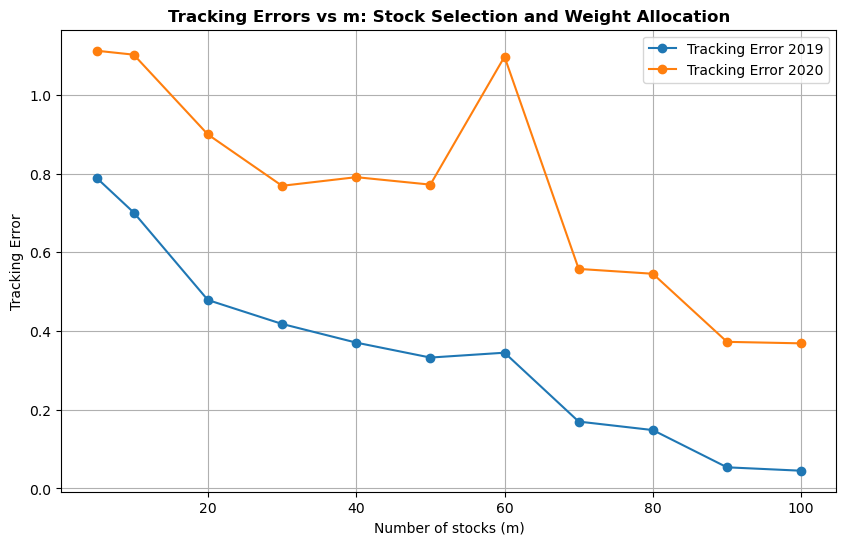

In [8]:
import matplotlib.pyplot as plt

# Extract the values for m, tracking errors for 2019, and tracking errors for 2020 from the results dictionary
m_values = sorted(list(results.keys()))  # Ensure values of m are sorted
tracking_errors_2019 = [results[m]['Tracking Error 2019'] for m in m_values]
tracking_errors_2020 = [results[m]['Tracking Error 2020'] for m in m_values]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(m_values, tracking_errors_2019, marker='o', label='Tracking Error 2019')
plt.plot(m_values, tracking_errors_2020, marker='o', label='Tracking Error 2020')
plt.xlabel('Number of stocks (m)')
plt.ylabel('Tracking Error')
plt.title('Tracking Errors vs m: Stock Selection and Weight Allocation', weight='bold')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Performance Comparison of 2019 and 2020 Index')

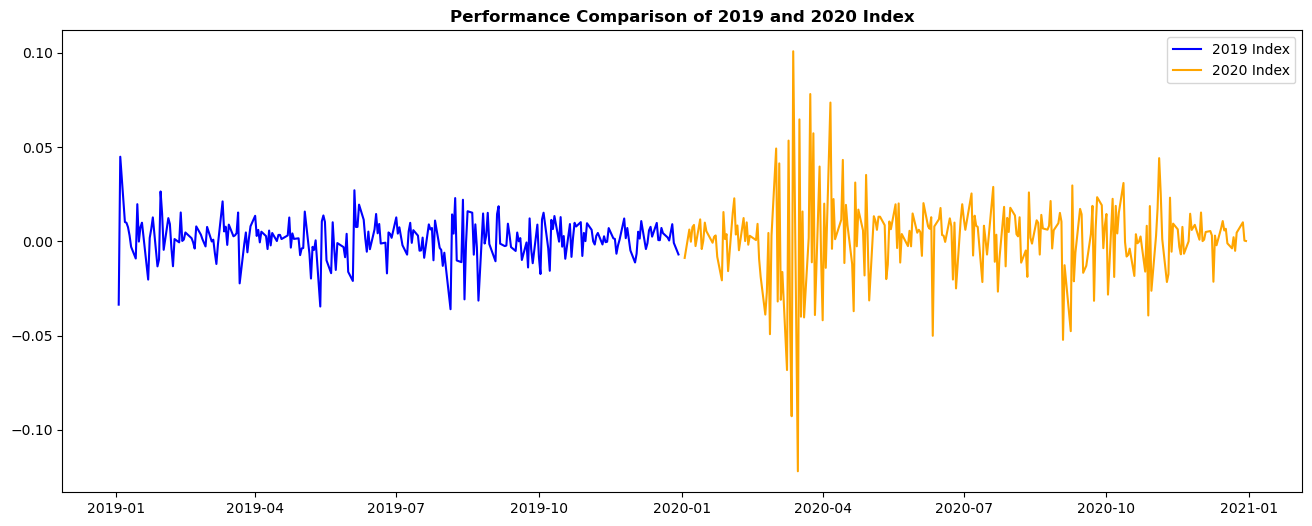

In [9]:
plt.figure(figsize=(16,6))
plt.plot(index_returns_2019, label='2019 Index', color='blue')
plt.plot(index_returns_2020, label='2020 Index', color='orange')
plt.legend()
plt.title("Performance Comparison of 2019 and 2020 Index",weight='bold')

## Q4.

**Another way you could solve this problem is to completely ignore the stock selection IP and re-
formulate the weight selection problem to be an MIP that constrains the number of non-zero
weights to be an integer. To do this take the weight selection problem and replace m with n so
that you are optimizing over ALL weights:  
$$ \min_{w} \sum_{t=1}^{T} \left| q_t - \sum_{i=1}^{n} w_i r_{it} \right| $$
Now define some
binary variables y1, y2, …, yn and add some constraints that force wi = 0 if yi = 0 using the ‘big M’
technique (What’s the smallest value of big M you could use?). You also need to add a
constraint that the sum of y’s is equal to m (m and M are different things here…).**

<div class="alert alert-block" style="background-color: green; color: white; text-align: center;"><span style="font-size: 16px;"> 
<strong>Portfolio Optimization using the Big M method</strong>

<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 

<strong>Decision Variables:</strong><br>

- $ w_i $: **Continuous variables representing the weight of each stock in the portfolio.**
- $ y_i $: **Binary variables indicating if a particular weight $ w_i $ is non-zero (active in the portfolio) or not.**

<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 

<strong>Objective function:</strong><br>
    
Minimize the total discrepancy between the portfolio returns and the index returns over all time periods, formulated as:
$$ \min_{w} \sum_{t=1}^{T} \left| q_t - \sum_{i=1}^{n} w_i r_{it} \right| $$


<div class="alert alert-block alert-success"><span style="font-size: 16px;"> 

<strong>Constraints:</strong><br>
    
- If the binary decision variable $ y_i $ is zero, then the corresponding weight $ w_i $ should be forced to zero. This is achieved using the <strong>big M</strong> technique:<br>
    
  $$ w_i \leq M \times y_i $$


    Where $ M $ is a large value.
<br>
    
- The sum of the weights of all stocks in the portfolio should be equal to 1.
    $$ \sum_{i=1}^{n} w_i = 1 $$
- The total number of active stocks (non-zero weights) is constrained to a specific integer, using:
  $$ \sum_{i=1}^{n} y_i = \text{specified integer i.e. m}$$

In [9]:
import pandas as pd
from gurobipy import Model, GRB

results = {}
selected_stocks_by_m = {}
tracking_errors_2019 = {}
tracking_errors_2020 = {}

BIG_M = 2  # Anything above 1 will work as maximum weight is 1. Taking 2 to be safe 
TIME_LIMIT = 3600  # Gurobi Time Limit

for m_value in values_of_m:
    mip = Model()

    # Decision Variables
    # We will use an additional constraint later to make sure weights are non-negative
    weights = mip.addVars(stock_returns_2019.columns, name="weights",lb=0) 
    y = mip.addVars(stock_returns_2019.columns, vtype=GRB.BINARY, name="y")
    z = mip.addVars(index_returns_2019.index, name="z")  # Auxiliary variable for absolute difference

    # Objective Function
    mip.setObjective(sum(z[t] for t in index_returns_2019.index), GRB.MINIMIZE)

    # Constraints
    for t in index_returns_2019.index:
        mip.addConstr(z[t] >= index_returns_2019.loc[t] - sum(weights[s] * stock_returns_2019.loc[t, s] for s in stock_returns_2019.columns))
        mip.addConstr(z[t] >= sum(weights[s] * stock_returns_2019.loc[t, s] for s in stock_returns_2019.columns) - index_returns_2019.loc[t])

    mip.addConstr(sum(weights[s] for s in stock_returns_2019.columns) == 1)
    mip.addConstr(sum(y[s] for s in stock_returns_2019.columns) == m_value)

    # Big M constraints
    for s in stock_returns_2019.columns:
        mip.addConstr(weights[s] <= BIG_M * y[s])

    # Set Time Limit for Gurobi
    mip.params.TimeLimit = TIME_LIMIT

    # Optimize
    mip.optimize()

    # Extract portfolio weights and store results
    portfolio_weights = {s: weights[s].x for s in stock_returns_2019.columns if y[s].x > 0.5}
    selected_stocks = [s for s in stock_returns_2019.columns if y[s].x > 0.5]
    
    results[m_value] = portfolio_weights
    selected_stocks_by_m[m_value] = selected_stocks

    # Calculate tracking error for 2019
    tracking_error_2019 = sum(
        abs(index_returns_2019[t] - sum(portfolio_weights[s] * stock_returns_2019.loc[t, s] for s in portfolio_weights))
        for t in index_returns_2019.index
    )
    tracking_errors_2019[m_value] = tracking_error_2019

    # Calculate tracking error for 2020 using the chosen stocks
    chosen_stock_returns_2020 = stock_returns_2020[list(portfolio_weights.keys())]
    tracking_error_2020 = sum(
        abs(index_returns_2020[t] - sum(portfolio_weights[s] * chosen_stock_returns_2020.loc[t, s] for s in chosen_stock_returns_2020.columns))
        for t in index_returns_2020.index
    )
    tracking_errors_2020[m_value] = tracking_error_2020
    
    
# Find the maximum list length
max_length = max(len(v) for v in selected_stocks_by_m.values())

# Pad the shorter lists with None
for key, value in selected_stocks_by_m.items():
    while len(value) < max_length:
        value.append(None)

# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results).transpose().fillna(0)
results_df = results_df.astype(float)  # Ensure that the data type is float
results_df.to_csv("weights_by_MIP_new.csv", float_format='%g')

# Convert tracking errors to DataFrame and save to CSV
tracking_errors_df = pd.DataFrame({'2019': tracking_errors_2019, '2020': tracking_errors_2020})
tracking_errors_df = tracking_errors_df.astype(float)  # Ensure data type is float for both columns
tracking_errors_df.to_csv("tracking_errors_by_MIP_new.csv", float_format='%g')

# Save selected stocks for each m to CSV using the padded selected_stocks_by_m
selected_stocks_df = pd.DataFrame(selected_stocks_by_m).transpose()
# If any columns are numeric, convert them to float
for col in selected_stocks_df.columns:
    if selected_stocks_df[col].apply(lambda x: isinstance(x, (int, float))).all():
        selected_stocks_df[col] = selected_stocks_df[col].astype(float)
selected_stocks_df.to_csv("selected_stocks_by_MIP_new.csv", float_format='%g')
        

Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 602 rows, 450 columns and 50708 nonzeros
Model fingerprint: 0x197b38cd
Variable types: 350 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [2e-05, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-05, 5e+00]
Found heuristic solution: objective 1.9064653
Presolve time: 0.03s
Presolved: 602 rows, 450 columns, 50708 nonzeros
Variable types: 350 continuous, 100 integer (100 binary)

Root relaxation: objective 4.491082e-02, 1688 iterations, 0.09 seconds (0.30 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.04491    0   84    1.90647    0.04491  97.6%     -    0s
H 

 243768 113708     cutoff   70         0.49926    0.32309  35.3%  82.2  370s
 247829 115301    0.45516   75   26    0.49926    0.32376  35.2%  82.1  375s
 252764 117144    0.48604   70   36    0.49926    0.32495  34.9%  82.0  380s
 256695 118564    0.41809   57   41    0.49926    0.32577  34.7%  81.9  385s
 261665 120394     cutoff   67         0.49926    0.32676  34.6%  81.7  390s
 266431 122351     cutoff   51         0.49926    0.32785  34.3%  81.6  395s
 270718 123927    0.41914   64   36    0.49926    0.32871  34.2%  81.5  400s
 275472 125531     cutoff   64         0.49926    0.32967  34.0%  81.4  405s
 280466 127504    0.43604   69   32    0.49926    0.33052  33.8%  81.2  410s
 285375 129474    0.46041   70   36    0.49926    0.33140  33.6%  81.0  415s
 289484 131036    0.33903   54   41    0.49926    0.33221  33.5%  80.9  420s
 293458 132765    0.44001   51   42    0.49926    0.33295  33.3%  80.8  425s
 297573 134158    0.33678   49   44    0.49926    0.33377  33.1%  80.7  430s

 724781 256749    0.44075   51   44    0.49926    0.38596  22.7%  73.5  910s
 729679 257768    0.40027   50   43    0.49926    0.38643  22.6%  73.5  915s
 734505 258763    0.42767   63   42    0.49926    0.38693  22.5%  73.4  920s
 739346 259776     cutoff   60         0.49926    0.38728  22.4%  73.4  925s
 744225 260761    0.40269   49   43    0.49926    0.38778  22.3%  73.3  930s
 749336 261727     cutoff   57         0.49926    0.38816  22.3%  73.2  935s
 755202 263211     cutoff   74         0.49926    0.38865  22.2%  73.2  940s
 759905 264123    0.42124   47   48    0.49926    0.38910  22.1%  73.1  945s
 764710 264919    0.42163   41   48    0.49926    0.38953  22.0%  73.1  950s
 770709 266318     cutoff   39         0.49926    0.39004  21.9%  73.0  955s
 775827 267197    0.44447   69   33    0.49926    0.39041  21.8%  72.9  960s
 780752 268208    0.44464   61   40    0.49926    0.39085  21.7%  72.9  965s
 785996 269214     cutoff   63         0.49926    0.39129  21.6%  72.8  970s

 1251668 321145    0.45721   64   38    0.49926    0.42370  15.1%  68.0 1440s
 1256968 321393     cutoff   55         0.49926    0.42399  15.1%  68.0 1445s
 1259673 321161     cutoff   49         0.49926    0.42418  15.0%  68.0 1454s
 1259744 321203    0.43447   39   45    0.49926    0.42418  15.0%  68.0 1455s
 1265186 321208     cutoff   49         0.49926    0.42451  15.0%  67.9 1460s
 1270580 321436    0.49086   36   46    0.49926    0.42486  14.9%  67.9 1465s
 1276014 321598    0.48001   67   36    0.49926    0.42517  14.8%  67.8 1470s
 1281605 321600     cutoff   50         0.49926    0.42552  14.8%  67.8 1475s
 1287762 321823     cutoff   59         0.49926    0.42586  14.7%  67.7 1480s
 1292891 321797     cutoff   51         0.49926    0.42618  14.6%  67.7 1485s
 1298329 321856     cutoff   51         0.49926    0.42651  14.6%  67.6 1490s
 1304586 321954    0.46412   59   40    0.49926    0.42684  14.5%  67.5 1495s
 1309655 321798    0.44250   51   45    0.49926    0.42718  14.4

 1843409 253038    0.46568   57   42    0.49926    0.45677  8.51%  62.5 1975s
 1849556 251308     cutoff   67         0.49926    0.45711  8.44%  62.4 1980s
 1856864 249152    0.45757   61   34    0.49926    0.45749  8.37%  62.3 1985s
 1863300 247144    0.46688   70   29    0.49926    0.45784  8.30%  62.3 1990s
 1870989 245315    0.48906   60   35    0.49926    0.45823  8.22%  62.2 1995s
 1878150 243151    0.45869   55   37    0.49926    0.45862  8.14%  62.1 2000s
 1884580 241321     cutoff   59         0.49926    0.45896  8.07%  62.0 2005s
 1891697 239204     cutoff   70         0.49926    0.45933  8.00%  62.0 2010s
 1897848 237437     cutoff   58         0.49926    0.45965  7.93%  61.9 2015s
 1905202 235247    0.48115   58   36    0.49926    0.46003  7.86%  61.8 2020s
 1908468 234557     cutoff   68         0.49926    0.46019  7.83%  61.8 2025s
 1914473 232527    0.46704   58   41    0.49926    0.46051  7.76%  61.7 2030s
 1920405 230660     cutoff   55         0.49926    0.46079  7.70

H    0     0                       0.5597049    0.04491  92.0%     -    1s
     0     0    0.04491    0   79    0.55970    0.04491  92.0%     -    1s
     0     0    0.04491    0   79    0.55970    0.04491  92.0%     -    2s
     0     0    0.04491    0   80    0.55970    0.04491  92.0%     -    2s
     0     0    0.04491    0   79    0.55970    0.04491  92.0%     -    2s
     0     0    0.04495    0   79    0.55970    0.04495  92.0%     -    3s
H    0     0                       0.5393816    0.04495  91.7%     -    3s
H    0     0                       0.5379926    0.04495  91.6%     -    3s
     0     2    0.04495    0   79    0.53799    0.04495  91.6%     -    3s
   257   223    0.12931   27   54    0.53799    0.04495  91.6%   116    5s
H  360   274                       0.4975819    0.04495  91.0%   117    7s
H  363   274                       0.4877662    0.04495  90.8%   117    7s
H  366   274                       0.4498564    0.04495  90.0%   117    7s
H  368   274             

 196620 117404     cutoff   38         0.30456    0.09810  67.8%   108  465s
 198833 118635    0.19497   53   46    0.30456    0.09826  67.7%   108  470s
 202246 120751    0.16788   39   52    0.30456    0.09853  67.6%   108  475s
 204675 122026    0.20261   47   44    0.30456    0.09861  67.6%   108  480s
 207884 124189    0.24260   63   34    0.30456    0.09888  67.5%   108  486s
 210301 125498    0.27665   70   33    0.30456    0.09903  67.5%   108  490s
 212850 126532    0.16886   52   49    0.30456    0.09927  67.4%   108  495s
 216117 128668    0.19314   55   44    0.30456    0.09943  67.4%   108  500s
 218566 130315    0.26870   62   33    0.30456    0.09963  67.3%   108  505s
 221903 132114    0.30418   73   34    0.30456    0.09998  67.2%   108  510s
 224282 133247    0.13331   40   58    0.30456    0.10020  67.1%   108  516s
 226964 134976    0.14491   34   56    0.30456    0.10044  67.0%   108  521s
 229518 136517     cutoff   47         0.30456    0.10063  67.0%   108  525s

 504090 290497    0.13895   40   58    0.30456    0.11777  61.3%   105 1010s
 507299 292313     cutoff   50         0.30456    0.11791  61.3%   105 1016s
 510720 294396    0.15384   36   57    0.30456    0.11799  61.3%   105 1021s
 513873 296357    0.22395   58   38    0.30456    0.11811  61.2%   105 1025s
 517137 298195    0.30267   57   31    0.30456    0.11823  61.2%   105 1031s
 520486 299859     cutoff   30         0.30456    0.11836  61.1%   105 1036s
 523003 301184    0.13983   35   54    0.30456    0.11847  61.1%   105 1040s
 526200 302992    0.16595   42   48    0.30456    0.11863  61.0%   105 1045s
 529282 304617    0.12987   41   57    0.30456    0.11875  61.0%   105 1051s
 531728 306131    0.29989  100   14    0.30456    0.11884  61.0%   105 1055s
 534981 307947    0.18069   47   51    0.30456    0.11901  60.9%   105 1061s
 536585 309015    0.19370   58   40    0.30456    0.11906  60.9%   105 1065s
 539102 309798    0.14300   43   50    0.30456    0.11915  60.9%   105 1072s

 823169 461140    0.18958   48   48    0.30456    0.12735  58.2%   102 1551s
 826366 462627    0.12761   33   59    0.30456    0.12742  58.2%   102 1555s
 829718 464298    0.17384   47   47    0.30456    0.12751  58.1%   102 1560s
 832953 466137     cutoff   41         0.30456    0.12757  58.1%   102 1565s
 835364 467244    0.29925   67   31    0.30456    0.12762  58.1%   102 1570s
 838493 468745    0.16515   37   53    0.30456    0.12771  58.1%   102 1575s
 840888 469936    0.17131   45   52    0.30456    0.12778  58.0%   102 1589s
 841563 470379    0.12784   42   60    0.30456    0.12779  58.0%   102 1590s
 844957 472064    0.17570   50   46    0.30456    0.12789  58.0%   102 1595s
 848187 473426    0.19113   42   57    0.30456    0.12796  58.0%   102 1602s
 850069 474823    0.18176   53   45    0.30456    0.12801  58.0%   102 1606s
 852604 476016    0.28918   56   37    0.30456    0.12808  57.9%   102 1610s
 855873 477825    0.12838   40   57    0.30456    0.12819  57.9%   102 1616s

 1157801 635576    0.16516   41   56    0.30456    0.13418  55.9%   100 2090s
 1161140 637192    0.17007   44   47    0.30456    0.13423  55.9%   100 2095s
 1165268 639079    0.15423   40   54    0.30456    0.13429  55.9%   100 2102s
 1166174 639882     cutoff   68         0.30456    0.13431  55.9%   100 2105s
 1169525 641518    0.15304   48   55    0.30456    0.13436  55.9%   100 2110s
 1172844 643201     cutoff   44         0.30456    0.13442  55.9%   100 2116s
 1175308 644537     cutoff   71         0.30456    0.13446  55.8%   100 2120s
 1178655 646437     cutoff   52         0.30456    0.13452  55.8%   100 2125s
 1181962 648398    0.19349   56   41    0.30456    0.13457  55.8%   100 2130s
 1185365 650025    0.15082   32   53    0.30456    0.13462  55.8%   100 2135s
 1188569 651640    0.18158   49   50    0.30456    0.13467  55.8%   100 2141s
 1191000 652691    0.16477   47   53    0.30456    0.13470  55.8%   100 2145s
 1193542 653734    0.24526   57   39    0.30456    0.13473  55.8

 1495117 809803    0.14613   32   58    0.30456    0.13924  54.3%  98.8 2631s
 1498519 811230    0.18551   46   50    0.30456    0.13928  54.3%  98.8 2635s
 1501734 812898    0.25603   64   35    0.30456    0.13932  54.3%  98.8 2640s
 1505800 814772    0.21149   52   45    0.30456    0.13939  54.2%  98.8 2645s
 1509137 816689     cutoff   50         0.30456    0.13942  54.2%  98.8 2650s
 1512672 818550    0.25345   68   34    0.30456    0.13946  54.2%  98.7 2655s
 1516665 820509    0.26823   59   38    0.30456    0.13951  54.2%  98.7 2660s
 1520688 822715     cutoff   47         0.30456    0.13956  54.2%  98.7 2666s
 1523999 824568    0.23229   70   29    0.30456    0.13960  54.2%  98.7 2670s
 1527403 826520    0.22561   58   37    0.30456    0.13964  54.2%  98.7 2675s
 1531358 828556    0.16135   48   51    0.30456    0.13969  54.1%  98.7 2680s
 1534535 830176    0.27335   67   29    0.30456    0.13974  54.1%  98.7 2685s
 1538462 832527    0.21107   39   48    0.30456    0.13981  54.1

 1823688 978355    0.29662   70   26    0.30456    0.14328  53.0%  97.6 3170s
 1826285 979629    0.25744   63   35    0.30456    0.14332  52.9%  97.6 3175s
 1829673 981210    0.15131   39   53    0.30456    0.14336  52.9%  97.6 3180s
 1832062 982206    0.14997   35   58    0.30456    0.14338  52.9%  97.6 3187s
 1833102 983029    0.18987   54   40    0.30456    0.14338  52.9%  97.6 3190s
 1836522 984740    0.22384   50   46    0.30456    0.14342  52.9%  97.6 3196s
 1839149 986117    0.24207   42   46    0.30456    0.14345  52.9%  97.6 3200s
 1842470 987597    0.18884   50   51    0.30456    0.14349  52.9%  97.6 3206s
 1844877 988888     cutoff   57         0.30456    0.14351  52.9%  97.6 3210s
 1848310 990682    0.21289   57   41    0.30456    0.14356  52.9%  97.5 3215s
 1851747 992076    0.24790   66   34    0.30456    0.14359  52.9%  97.5 3220s
 1855214 993736    0.16577   37   55    0.30456    0.14362  52.8%  97.5 3226s
 1858363 995458     cutoff   58         0.30456    0.14365  52.8

     0     0    0.04491    0   72    0.42849    0.04491  89.5%     -    0s
     0     0    0.04491    0   69    0.42849    0.04491  89.5%     -    1s
     0     0    0.04491    0   69    0.42849    0.04491  89.5%     -    1s
H    0     0                       0.3917406    0.04491  88.5%     -    1s
     0     0    0.04491    0   69    0.39174    0.04491  88.5%     -    1s
H    0     0                       0.3766132    0.04491  88.1%     -    2s
     0     0    0.04491    0   69    0.37661    0.04491  88.1%     -    2s
     0     0    0.04491    0   69    0.37661    0.04491  88.1%     -    2s
     0     0    0.04491    0   69    0.37661    0.04491  88.1%     -    3s
     0     2    0.04491    0   69    0.37661    0.04491  88.1%     -    3s
   109   118    0.04515   16   66    0.37661    0.04491  88.1%  11.9    5s
H  184   185                       0.3766130    0.04491  88.1%  23.9    5s
H  362   288                       0.3425097    0.04491  86.9%  60.9    8s
H  363   288             

 143694 84786    0.15852   42   49    0.17658    0.04875  72.4%   101  452s
 144527 85861    0.14118   66   37    0.17658    0.04877  72.4%   101  455s
 146206 86482    0.09272   53   47    0.17658    0.04880  72.4%   101  460s
 148389 88029    0.05936   34   61    0.17658    0.04885  72.3%   101  465s
 150926 89566    0.16862   68   31    0.17658    0.04891  72.3%   101  470s
 153520 91114    0.06471   41   62    0.17658    0.04896  72.3%   101  475s
 156043 92607     cutoff   58         0.17658    0.04898  72.3%   101  480s
 158461 93958    0.10320   50   48    0.17658    0.04900  72.3%   101  486s
 160451 95409     cutoff   55         0.17658    0.04905  72.2%   101  491s
 162832 96692    0.08653   43   57    0.17658    0.04906  72.2%   101  496s
 165439 98195    0.10672   60   47    0.17658    0.04912  72.2%   101  501s
 167748 99550    0.05000   35   67    0.17658    0.04916  72.2%   101  505s
 170210 101206    0.06859   44   60    0.17658    0.04920  72.1%   101  510s
 172292 102

 390295 233010     cutoff   57         0.17658    0.05165  70.7%   102 1015s
 392757 234246    0.12615   65   41    0.17658    0.05166  70.7%   102 1020s
 395914 236331    0.15522   73   29    0.17658    0.05168  70.7%   102 1025s
 398319 238025    0.08066   48   53    0.17658    0.05170  70.7%   102 1030s
 401622 239957    0.09936   50   49    0.17658    0.05173  70.7%   102 1036s
 404047 241408    0.10199   39   55    0.17658    0.05174  70.7%   102 1040s
 406439 243134    0.13514   61   38    0.17658    0.05175  70.7%   102 1045s
 409942 245277     cutoff   43         0.17658    0.05178  70.7%   102 1050s
 412341 246866    0.06095   46   62    0.17658    0.05180  70.7%   102 1055s
 415583 248674    0.15121   67   37    0.17658    0.05181  70.7%   102 1060s
 417882 250071    0.13759   62   42    0.17658    0.05182  70.7%   101 1065s
 421156 251605    0.11469   56   45    0.17658    0.05184  70.6%   101 1070s
 423573 253100    0.16910   75   28    0.17658    0.05185  70.6%   101 1075s

 689303 411535    0.08525   49   57    0.17658    0.05306  69.9%   100 1550s
 691625 413051    0.09501   43   48    0.17658    0.05307  69.9%   100 1555s
 693951 414513    0.15953   82   27    0.17658    0.05308  69.9%   100 1560s
 696432 415804    0.15422   69   35    0.17658    0.05310  69.9%   100 1565s
 699061 417355    0.10699   54   47    0.17658    0.05310  69.9%   100 1570s
 701412 418986    0.12908   63   32    0.17658    0.05311  69.9%   100 1576s
 703988 420150    0.13319   64   37    0.17658    0.05312  69.9%   100 1582s
 705253 421380    0.11668   47   44    0.17658    0.05312  69.9%   100 1585s
 707861 422782    0.08749   46   53    0.17658    0.05314  69.9%   100 1591s
 709530 423889    0.06878   30   62    0.17658    0.05314  69.9%   100 1595s
 712055 425651    0.08454   45   54    0.17658    0.05314  69.9%   100 1600s
 714536 427031    0.16945   42   50    0.17658    0.05316  69.9%   100 1605s
 717786 428788    0.09051   52   49    0.17658    0.05316  69.9%   100 1611s

 968541 575121    0.14009   57   39    0.17658    0.05406  69.4%   101 2111s
 971097 576821    0.08422   44   50    0.17658    0.05407  69.4%   101 2115s
 974348 578715    0.06717   44   60    0.17658    0.05408  69.4%   101 2121s
 976757 580204    0.11300   57   43    0.17658    0.05409  69.4%   101 2125s
 979137 581798    0.15912   71   29    0.17658    0.05410  69.4%   101 2130s
 982513 584004    0.09090   48   50    0.17658    0.05411  69.4%   101 2136s
 983306 584012    0.09458   43   54    0.17658    0.05411  69.4%   101 2146s
 984797 585058     cutoff   47         0.17658    0.05411  69.4%   101 2151s
 987193 586750    0.14731   68   35    0.17658    0.05412  69.4%   101 2156s
 988570 587295    0.14411   60   39    0.17658    0.05412  69.4%   101 2160s
 991163 588833    0.16354   35   51    0.17658    0.05413  69.3%   100 2165s
 993604 590454    0.10094   54   46    0.17658    0.05413  69.3%   100 2170s
 996923 591994    0.06170   42   63    0.17658    0.05414  69.3%   100 2176s

 1207747 693573    0.16712   45   49    0.17013    0.05478  67.8%   101 2615s
 1210253 695163    0.09890   54   48    0.17013    0.05478  67.8%   101 2620s
 1211076 695171    0.15751   78   31    0.17013    0.05478  67.8%   101 2629s
 1211084 695548    0.15986   79   29    0.17013    0.05478  67.8%   101 2630s
 1213793 697113    0.09701   50   48    0.17013    0.05479  67.8%   101 2635s
H1215430 693409                       0.1693544    0.05479  67.6%   101 2639s
H1215504 668710                       0.1656979    0.05479  66.9%   101 2639s
 1215912 669158     cutoff   79         0.16570    0.05479  66.9%   101 2640s
 1218311 670178    0.06896   44   57    0.16570    0.05480  66.9%   101 2646s
 1220842 671470    0.11615   59   43    0.16570    0.05481  66.9%   101 2651s
H1221021 670266                       0.1655411    0.05481  66.9%   101 2651s
 1222162 671099    0.06921   45   62    0.16554    0.05481  66.9%   101 2655s
 1224781 672508     cutoff   54         0.16554    0.05482  66.9

 1433906 744319    0.06650   42   57    0.16041    0.05539  65.5%   101 3131s
 1435604 745424    0.07321   37   61    0.16041    0.05539  65.5%   101 3135s
 1438209 746892     cutoff   70         0.16041    0.05540  65.5%   101 3140s
 1440765 748564    0.11790   64   41    0.16041    0.05540  65.5%   101 3145s
 1442431 749213    0.06373   44   58    0.16041    0.05540  65.5%   101 3156s
 1443603 749899    0.05957   41   62    0.16041    0.05540  65.5%   101 3161s
 1445176 751043    0.09610   45   54    0.16041    0.05540  65.5%   101 3166s
 1447281 751908    0.15341   75   30    0.16041    0.05541  65.5%   101 3170s
 1449976 753410    0.11181   55   44    0.16041    0.05542  65.5%   101 3176s
 1452726 754848    0.15365   60   44    0.16041    0.05542  65.4%   101 3181s
 1455389 756417    0.08744   51   50    0.16041    0.05543  65.4%   101 3186s
 1457919 757876    0.12845   43   50    0.16041    0.05543  65.4%   101 3191s
 1460211 758999    0.15794   67   32    0.16041    0.05544  65.4

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.04491    0   64    1.90647    0.04491  97.6%     -    0s
H    0     0                       0.3053952    0.04491  85.3%     -    0s
H    0     0                       0.2802623    0.04491  84.0%     -    0s
     0     0    0.04491    0   64    0.28026    0.04491  84.0%     -    0s
     0     0    0.04491    0   59    0.28026    0.04491  84.0%     -    1s
     0     0    0.04491    0   59    0.28026    0.04491  84.0%     -    1s
H    0     0                       0.2704176    0.04491  83.4%     -    2s
     0     0    0.04491    0   59    0.27042    0.04491  83.4%     -    2s
     0     0    0.04491    0   59    0.27042    0.04491  83.4%     -    2s
     0     0    0.04491    0   59    0.27042    0.04491  83.4%     -    3s
     0     0    0.04491    0   59    0.27042    0.04491  83.4%     -    4s
H    0     0                       0.2545399    0.04491  82.4%     -    4s
     0     2    0.0449

 120541 70304    0.07782   47   51    0.11456    0.04604  59.8%  84.9  395s
 122937 71992    0.04854   49   55    0.11456    0.04606  59.8%  84.8  400s
 125479 73360    0.08176   62   33    0.11456    0.04609  59.8%  84.7  405s
 127746 74530    0.06716   45   54    0.11456    0.04612  59.7%  84.8  410s
 130701 76236     cutoff   70         0.11456    0.04614  59.7%  84.9  416s
 133522 77958     cutoff   90         0.11456    0.04614  59.7%  84.8  421s
 135808 79671    0.08072   42   53    0.11456    0.04617  59.7%  84.8  425s
 138481 81299    0.04953   34   58    0.11456    0.04620  59.7%  84.7  430s
 141534 83118    0.06874   55   46    0.11456    0.04623  59.6%  84.8  436s
 143842 84537    0.07050   60   45    0.11456    0.04625  59.6%  84.9  441s
 146129 85966    0.07708   53   45    0.11456    0.04625  59.6%  85.1  446s
 148694 87578    0.07031   49   51    0.11456    0.04628  59.6%  85.1  450s
 151246 89251    0.04681   37   53    0.11456    0.04628  59.6%  85.1  455s
 153634 9092

 367947 215106     cutoff   68         0.11452    0.04741  58.6%  85.4  960s
 369978 216858    0.06813   55   49    0.11452    0.04742  58.6%  85.4  965s
 372420 218301     cutoff   51         0.11452    0.04743  58.6%  85.4  970s
 375619 219744     cutoff   60         0.11452    0.04744  58.6%  85.4  976s
 378175 221474    0.09662   79   28    0.11452    0.04744  58.6%  85.4  980s
 380520 222584     cutoff   51         0.11452    0.04745  58.6%  85.4  985s
 382593 223917    0.08045   66   41    0.11452    0.04746  58.6%  85.4  990s
 384881 225331    0.05582   46   60    0.11452    0.04746  58.6%  85.4  995s
 387397 226499    0.08691   68   36    0.11452    0.04747  58.6%  85.4 1000s
 389843 228067    0.07876   52   44    0.11452    0.04748  58.5%  85.4 1005s
 393289 230263    0.05798   46   53    0.11452    0.04749  58.5%  85.4 1011s
 394426 230846     cutoff   74         0.11452    0.04749  58.5%  85.4 1015s
 396961 232005    0.07882   50   47    0.11452    0.04749  58.5%  85.4 1020s

 646030 372291    0.10847   90   21    0.11285    0.04812  57.4%  85.6 1531s
 647904 373591    0.08911   61   40    0.11285    0.04812  57.4%  85.6 1535s
 651121 375299     cutoff   63         0.11285    0.04813  57.4%  85.6 1541s
 653592 376710    0.06142   52   51    0.11285    0.04813  57.4%  85.6 1545s
 656869 378652    0.05438   53   53    0.11285    0.04813  57.3%  85.6 1550s
 658984 379938     cutoff   65         0.11285    0.04814  57.3%  85.6 1555s
 662517 381886    0.09118   72   34    0.11285    0.04815  57.3%  85.6 1561s
 664863 383357    0.07274   63   46    0.11285    0.04815  57.3%  85.6 1565s
 667380 384529    0.07073   60   45    0.11285    0.04816  57.3%  85.6 1578s
 667739 385187    0.07189   61   42    0.11285    0.04816  57.3%  85.6 1580s
 670001 386284    0.09165   74   33    0.11285    0.04817  57.3%  85.6 1585s
 672634 387851    0.10189   77   33    0.11285    0.04817  57.3%  85.6 1590s
 675288 389501    0.05840   45   53    0.11285    0.04817  57.3%  85.6 1595s

 957272 552223    0.05342   54   53    0.11285    0.04863  56.9%  85.8 2396s
 960435 553645    0.09449   72   35    0.11285    0.04863  56.9%  85.8 2401s
 962947 555163    0.08592   62   40    0.11285    0.04864  56.9%  85.8 2405s
 965333 556210    0.07554   59   44    0.11285    0.04864  56.9%  85.8 2410s
 967699 557635    0.09112   59   39    0.11285    0.04864  56.9%  85.8 2415s
 970169 559306    0.08908   62   34    0.11285    0.04865  56.9%  85.8 2421s
 972542 560515    0.08639   60   41    0.11285    0.04865  56.9%  85.8 2425s
 975037 562065    0.05798   48   57    0.11285    0.04866  56.9%  85.8 2430s
 978424 564202    0.07242   64   45    0.11285    0.04867  56.9%  85.8 2436s
 980685 565591    0.10284   75   32    0.11285    0.04867  56.9%  85.8 2440s
 984207 567402    0.05860   56   48    0.11285    0.04867  56.9%  85.8 2445s
 987337 568998     cutoff   64         0.11285    0.04868  56.9%  85.8 2451s
 989878 570106    0.05931   53   49    0.11285    0.04868  56.9%  85.8 2455s

 1268242 726769    0.08820   65   43    0.11285    0.04901  56.6%  85.8 2925s
 1271647 729068    0.05863   50   55    0.11285    0.04901  56.6%  85.8 2930s
 1275172 731024    0.06139   47   54    0.11285    0.04901  56.6%  85.8 2935s
 1278472 733025    0.05875   52   53    0.11285    0.04902  56.6%  85.8 2940s
 1281650 735049    0.05994   55   48    0.11285    0.04902  56.6%  85.8 2945s
 1283923 736466    0.09930   58   43    0.11285    0.04902  56.6%  85.8 2950s
 1287179 738502    0.07500   60   45    0.11285    0.04903  56.6%  85.8 2956s
 1289713 739764    0.05152   51   49    0.11285    0.04903  56.6%  85.8 2960s
 1293048 741892    0.10092   70   29    0.11285    0.04903  56.6%  85.8 2966s
 1295391 743032     cutoff   73         0.11285    0.04904  56.5%  85.8 2970s
 1298790 745162    0.07312   57   47    0.11285    0.04904  56.5%  85.8 2975s
 1302203 746945    0.05414   49   54    0.11285    0.04905  56.5%  85.8 2980s
 1305358 748912    0.11010   73   31    0.11285    0.04905  56.5

 1588019 904966     cutoff   91         0.11285    0.04935  56.3%  85.8 3455s
 1590730 906308     cutoff   79         0.11285    0.04935  56.3%  85.8 3460s
 1594231 908235    0.06292   55   51    0.11285    0.04935  56.3%  85.8 3466s
 1596924 909645    0.05521   54   50    0.11285    0.04936  56.3%  85.8 3470s
 1600401 911717    0.06951   48   50    0.11285    0.04936  56.3%  85.8 3476s
 1603044 913392    0.08020   63   45    0.11285    0.04936  56.3%  85.8 3480s
 1606246 914872    0.08210   48   44    0.11285    0.04937  56.3%  85.8 3485s
 1608876 915878    0.08478   65   36    0.11285    0.04937  56.3%  85.8 3496s
 1610539 917441    0.10481   65   33    0.11285    0.04937  56.3%  85.8 3500s
 1612682 918760    0.05235   46   55    0.11285    0.04937  56.3%  85.8 3505s
 1615308 920089    0.06438   51   52    0.11285    0.04937  56.2%  85.8 3510s
 1618774 922060    0.06988   52   45    0.11285    0.04938  56.2%  85.8 3515s
 1620801 922994    0.06417   49   49    0.11285    0.04938  56.2

 38684 20632    0.04992   55   48    0.08570    0.04560  46.8%  87.1  190s
 41709 22730    0.06805   53   38    0.08570    0.04567  46.7%  86.8  196s
 44301 24335     cutoff   65         0.08570    0.04577  46.6%  86.8  200s
 48539 26804    0.06526   51   48    0.08570    0.04583  46.5%  87.0  206s
 51825 28400     cutoff   66         0.08570    0.04591  46.4%  87.4  211s
 54793 30322    0.07759   76   30    0.08570    0.04591  46.4%  87.4  215s
 58207 32742    0.06261   47   47    0.08570    0.04596  46.4%  87.1  220s
 61667 34778     cutoff   59         0.08570    0.04599  46.3%  86.7  225s
 64783 36606    0.05334   58   45    0.08570    0.04604  46.3%  87.2  231s
 66855 38140    0.06503   52   44    0.08570    0.04606  46.3%  87.6  235s
 70614 40611    0.07009   58   36    0.08570    0.04607  46.2%  87.3  240s
 74016 42499     cutoff   62         0.08570    0.04608  46.2%  87.0  246s
 75977 43489    0.07065   87   20    0.08570    0.04609  46.2%  87.1  250s
 79545 45045    0.06444  

 354011 203817    0.05035   57   43    0.08253    0.04690  43.2%  86.6  726s
 357372 205743    0.06082   64   40    0.08253    0.04690  43.2%  86.5  730s
 361404 208255    0.07631   70   34    0.08253    0.04691  43.2%  86.4  735s
 364648 210218    0.06044   67   38    0.08253    0.04691  43.2%  86.4  740s
 369066 213092    0.06281   67   40    0.08253    0.04692  43.1%  86.2  746s
 372348 214988    0.07405   65   37    0.08253    0.04692  43.1%  86.1  750s
 375580 217036    0.05207   47   48    0.08253    0.04693  43.1%  86.1  755s
 379767 219175    0.06987   59   36    0.08253    0.04694  43.1%  86.1  761s
 382904 221230    0.05921   64   41    0.08253    0.04694  43.1%  86.1  765s
 386274 223280    0.05531   60   39    0.08253    0.04695  43.1%  86.1  770s
 389660 225367    0.06477   79   30    0.08253    0.04695  43.1%  86.0  775s
 393116 227504    0.05069   58   46    0.08253    0.04695  43.1%  85.9  780s
 397247 230068     cutoff   91         0.08253    0.04696  43.1%  85.8  785s

 690771 387601    0.05601   42   45    0.08042    0.04737  41.1%  84.8 1241s
 694274 389665    0.05648   69   38    0.08042    0.04737  41.1%  84.7 1245s
 697841 391618    0.06387   66   39    0.08042    0.04737  41.1%  84.7 1251s
 701380 393760    0.05105   60   47    0.08042    0.04737  41.1%  84.7 1255s
 703074 394421    0.04835   60   45    0.08042    0.04737  41.1%  84.7 1264s
 703083 394737    0.04748   60   45    0.08042    0.04737  41.1%  84.7 1265s
 705768 396464    0.05341   55   41    0.08042    0.04738  41.1%  84.7 1270s
 708997 398202     cutoff   73         0.08042    0.04738  41.1%  84.7 1275s
 711910 400078    0.05110   59   45    0.08042    0.04738  41.1%  84.7 1280s
 716019 402809    0.06456   59   43    0.08042    0.04738  41.1%  84.6 1286s
 719487 404840    0.06995   76   28    0.08042    0.04739  41.1%  84.6 1290s
 722892 406758    0.05193   61   41    0.08042    0.04739  41.1%  84.5 1295s
 726357 408778    0.05864   65   40    0.08042    0.04740  41.1%  84.5 1300s

 1024593 588903     cutoff   70         0.08042    0.04762  40.8%  83.7 1776s
 1025439 588911    0.07796   82   26    0.08042    0.04762  40.8%  83.7 1783s
 1026151 589786    0.05653   58   43    0.08042    0.04762  40.8%  83.7 1785s
 1028642 591133     cutoff   67         0.08042    0.04763  40.8%  83.7 1790s
 1031889 593234    0.06193   64   36    0.08042    0.04763  40.8%  83.7 1796s
 1035335 595328    0.07635   89   18    0.08042    0.04763  40.8%  83.7 1800s
 1038615 597200    0.05111   59   49    0.08042    0.04763  40.8%  83.7 1806s
 1040712 598384     cutoff   77         0.08042    0.04764  40.8%  83.7 1810s
 1043761 600062    0.06671   78   29    0.08042    0.04764  40.8%  83.7 1815s
 1047578 602589    0.05094   42   45    0.08042    0.04764  40.8%  83.7 1820s
 1051133 604586     cutoff   49         0.08042    0.04764  40.8%  83.7 1825s
 1054593 606709     cutoff   71         0.08042    0.04765  40.7%  83.7 1830s
 1057909 608816    0.07115   86   24    0.08042    0.04765  40.7

 1352236 786399    0.08002   83   27    0.08042    0.04782  40.5%  83.2 2311s
 1355369 788225    0.05060   61   48    0.08042    0.04782  40.5%  83.2 2315s
 1358615 790128    0.06943   75   30    0.08042    0.04782  40.5%  83.2 2320s
 1361859 791455    0.07515   63   39    0.08042    0.04782  40.5%  83.3 2326s
 1364567 793793    0.06746   58   41    0.08042    0.04782  40.5%  83.2 2330s
 1368269 795970     cutoff   92         0.08042    0.04783  40.5%  83.2 2335s
 1371799 798214    0.05885   67   40    0.08042    0.04783  40.5%  83.2 2340s
 1374311 799765    0.05450   66   42    0.08042    0.04783  40.5%  83.2 2346s
 1377139 801603    0.07249   63   36    0.08042    0.04783  40.5%  83.2 2351s
 1380196 803131    0.07780   76   30    0.08042    0.04783  40.5%  83.2 2356s
 1382516 804544    0.06397   49   41    0.08042    0.04783  40.5%  83.2 2360s
 1385009 805993    0.04890   62   45    0.08042    0.04783  40.5%  83.2 2365s
 1388266 807787    0.06353   66   39    0.08042    0.04783  40.5

 1694811 990188    0.05245   54   45    0.08042    0.04797  40.4%  82.9 2856s
 1697454 991982    0.06711   76   34    0.08042    0.04797  40.3%  82.9 2860s
 1701384 994332     cutoff   65         0.08042    0.04797  40.3%  82.8 2865s
 1704085 996034    0.05457   64   39    0.08042    0.04797  40.3%  82.8 2871s
 1706854 997743     cutoff   72         0.08042    0.04797  40.3%  82.8 2875s
 1709347 999282    0.06285   77   28    0.08042    0.04797  40.3%  82.8 2880s
 1712008 1000911    0.07668   94   14    0.08042    0.04798  40.3%  82.8 2885s
 1715533 1003218    0.06529   68   39    0.08042    0.04798  40.3%  82.8 2890s
 1719592 1005680    0.07819   84   22    0.08042    0.04798  40.3%  82.8 2896s
 1722434 1007171    0.06899   70   37    0.08042    0.04798  40.3%  82.8 2901s
 1725321 1008684    0.05961   67   37    0.08042    0.04798  40.3%  82.8 2906s
 1728188 1010432    0.05218   64   44    0.08042    0.04798  40.3%  82.8 2910s
 1729130 1010439    0.05532   69   39    0.08042    0.0479

 2026167 1180879    0.06635   59   39    0.08024    0.04809  40.1%  82.9 3380s
 2029735 1182911     cutoff   82         0.08024    0.04810  40.1%  82.9 3385s
 2032674 1184818     cutoff   65         0.08024    0.04810  40.1%  82.9 3390s
 2036906 1187249    0.06134   77   29    0.08024    0.04810  40.1%  82.9 3395s
 2039089 1188499    0.07397   63   35    0.08024    0.04810  40.1%  82.9 3400s
 2042065 1190220    0.05686   67   41    0.08024    0.04810  40.1%  82.9 3405s
 2046284 1192718    0.06377   69   39    0.08024    0.04810  40.1%  82.9 3411s
 2049072 1194327    0.05709   60   42    0.08024    0.04810  40.1%  82.9 3415s
 2052850 1196598    0.06341   70   39    0.08024    0.04810  40.0%  82.9 3421s
 2056032 1198386    0.07995   81   29    0.08024    0.04811  40.0%  82.9 3426s
 2058894 1200131    0.06650   71   33    0.08024    0.04811  40.0%  82.9 3431s
 2062024 1201916    0.05151   49   47    0.08024    0.04811  40.0%  82.9 3435s
 2064858 1203607    0.05833   59   43    0.08024    

 10279  6153    0.05118   51   38    0.07404    0.04491  39.3%  46.9   30s
H11144  6021                       0.0731063    0.04491  38.6%  46.4   31s
 14018  7963    0.06012   78   25    0.07311    0.04506  38.4%  48.0   35s
 14444  7970    0.06450   81   23    0.07311    0.04514  38.3%  48.2   41s
 14453  9539     cutoff   82         0.07311    0.04514  38.3%  48.2   46s
H14777  9510                       0.0729088    0.04514  38.1%  48.4   46s
 18718 10981    0.04747   68   35    0.07291    0.04527  37.9%  49.8   50s
 23499 13931    0.06137   80   28    0.07291    0.04531  37.9%  50.3   55s
 26950 15980    0.05826   70   33    0.07291    0.04533  37.8%  51.2   60s
 29834 18161    0.05689   55   37    0.07291    0.04536  37.8%  51.0   84s
 31267 18813    0.06124   65   28    0.07291    0.04536  37.8%  50.5   85s
 36426 21962    0.05536   51   39    0.07291    0.04537  37.8%  50.2   90s
 40221 24129    0.05015   66   37    0.07291    0.04538  37.8%  50.2   95s
 42894 25626    0.05625  

 313641 149600    0.05619   79   28    0.06227    0.04574  26.5%  51.5  485s
 317808 151997    0.04891   60   36    0.06227    0.04575  26.5%  51.5  490s
 321992 153997    0.04754   68   34    0.06227    0.04575  26.5%  51.4  495s
 327087 157378    0.05178   55   33    0.06227    0.04576  26.5%  51.3  501s
 330468 159078    0.05675   66   30    0.06227    0.04576  26.5%  51.3  505s
 335416 162014     cutoff   75         0.06227    0.04577  26.5%  51.2  510s
 340224 164789    0.05561   75   32    0.06227    0.04577  26.5%  51.1  515s
 344285 166862    0.05204   68   32    0.06227    0.04577  26.5%  51.2  520s
 348096 168899    0.06208   89   17    0.06227    0.04578  26.5%  51.2  525s
 352719 171616    0.05586   75   29    0.06227    0.04579  26.5%  51.2  530s
 357280 174422    0.05641   81   23    0.06227    0.04579  26.5%  51.1  535s
 362210 177174    0.05293   76   30    0.06227    0.04580  26.5%  51.1  540s
 365495 179365    0.05704   76   30    0.06227    0.04580  26.5%  51.2  545s

 766614 406303    0.05521   73   30    0.06227    0.04600  26.1%  50.3 1020s
 770793 408581    0.06123   96   16    0.06227    0.04601  26.1%  50.3 1025s
 773776 409662    0.06184   82   27    0.06227    0.04601  26.1%  50.3 1035s
 773789 414168    0.06184   83   27    0.06227    0.04601  26.1%  50.3 1045s
 784697 416356    0.05397   74   29    0.06227    0.04601  26.1%  50.3 1050s
 789081 418796    0.05881   68   27    0.06227    0.04601  26.1%  50.3 1055s
 793122 420931    0.06226   90   20    0.06227    0.04601  26.1%  50.3 1061s
 796246 422608    0.05690   78   29    0.06227    0.04602  26.1%  50.3 1065s
 800367 424789    0.05552   68   33    0.06227    0.04602  26.1%  50.3 1070s
 803857 426398     cutoff   75         0.06227    0.04602  26.1%  50.4 1076s
H804193 412256                       0.0618180    0.04602  25.6%  50.4 1076s
 806738 414072    0.05159   72   34    0.06182    0.04602  25.6%  50.4 1080s
H806939 408480                       0.0615869    0.04602  25.3%  50.4 1080s

 1142223 581067     cutoff   73         0.06105    0.04611  24.5%  49.9 1520s
 1145518 583153    0.06087   80   25    0.06105    0.04611  24.5%  49.9 1525s
 1150091 585523    0.05986   77   30    0.06105    0.04611  24.5%  49.9 1530s
 1153204 587146     cutoff   79         0.06105    0.04612  24.5%  49.9 1535s
 1156846 589149    0.05042   68   36    0.06105    0.04612  24.5%  49.9 1540s
 1161144 591327     cutoff   81         0.06105    0.04612  24.5%  49.9 1546s
 1164298 593409     cutoff   80         0.06105    0.04612  24.5%  49.9 1550s
 1169017 595935    0.05079   67   35    0.06105    0.04612  24.5%  49.9 1556s
 1172376 597918    0.06094   81   25    0.06105    0.04612  24.5%  49.9 1560s
 1177431 600780    0.04786   68   37    0.06105    0.04612  24.5%  49.9 1565s
 1181983 603508    0.05188   72   34    0.06105    0.04612  24.5%  49.9 1571s
 1185069 605267    0.05518   80   25    0.06105    0.04612  24.5%  49.9 1575s
 1189235 607673    0.06089   81   24    0.06105    0.04612  24.5

 1534637 792035    0.05271   54   35    0.06105    0.04621  24.3%  50.0 2050s
 1538220 793863     cutoff   87         0.06105    0.04621  24.3%  50.0 2055s
 1542925 796556    0.05252   66   36    0.06105    0.04621  24.3%  50.0 2061s
 1546550 798680    0.04963   71   32    0.06105    0.04622  24.3%  50.0 2065s
 1550359 800811    0.04869   67   40    0.06105    0.04622  24.3%  50.0 2070s
 1556409 804361    0.04642   54   38    0.06105    0.04622  24.3%  50.0 2075s
 1561118 806861    0.05025   77   30    0.06105    0.04622  24.3%  50.0 2080s
 1564710 808770    0.05649   77   30    0.06105    0.04622  24.3%  50.0 2085s
 1569619 811457     cutoff   63         0.06105    0.04622  24.3%  49.9 2091s
 1574242 814034     cutoff   77         0.06105    0.04622  24.3%  49.9 2096s
 1577634 816018    0.05911   69   31    0.06105    0.04622  24.3%  49.9 2100s
 1580155 816830    0.05562   69   32    0.06105    0.04622  24.3%  49.9 2107s
 1581246 818270    0.04631   54   38    0.06105    0.04622  24.3

 1933286 1005854    0.04945   72   37    0.06105    0.04630  24.2%  49.9 2580s
 1936611 1008067    0.05258   75   29    0.06105    0.04630  24.2%  49.9 2585s
 1941977 1010996    0.04964   74   35    0.06105    0.04630  24.2%  49.9 2590s
 1945154 1012637    0.05178   65   34    0.06105    0.04630  24.2%  49.9 2595s
 1948260 1014185     cutoff   78         0.06105    0.04630  24.2%  49.9 2600s
 1952901 1016933    0.06038   83   24    0.06105    0.04630  24.2%  49.9 2605s
 1957108 1019056    0.04993   54   40    0.06105    0.04630  24.2%  49.9 2610s
 1961495 1021266    0.05025   54   38    0.06105    0.04631  24.2%  49.9 2615s
 1965942 1023342    0.05606   79   31    0.06105    0.04631  24.2%  49.9 2621s
 1968990 1025157    0.06081   85   23    0.06105    0.04631  24.2%  49.9 2626s
 1971517 1026949    0.04631   64   37    0.06105    0.04631  24.2%  49.9 2630s
 1976696 1029559    0.05275   69   34    0.06105    0.04631  24.2%  49.9 2635s
 1980120 1031235     cutoff   71         0.06105    

 2330659 1221253    0.04949   74   34    0.06105    0.04637  24.1%  49.9 3101s
 2333665 1222936    0.05708   57   36    0.06105    0.04637  24.1%  49.9 3106s
 2337965 1225203    0.04637   52   41    0.06105    0.04637  24.1%  49.9 3111s
 2341551 1227247    0.05332   82   26    0.06105    0.04637  24.1%  49.9 3115s
 2345450 1229442    0.04939   66   36    0.06105    0.04637  24.1%  49.9 3120s
 2350382 1231937    0.05669   76   35    0.06105    0.04637  24.1%  49.9 3126s
 2353909 1233860    0.05195   70   34    0.06105    0.04637  24.1%  49.9 3130s
 2357620 1235985    0.05763   73   29    0.06105    0.04637  24.1%  49.9 3135s
 2361090 1237638    0.05437   75   25    0.06105    0.04637  24.0%  49.9 3140s
 2366107 1240077    0.05305   69   35    0.06105    0.04637  24.0%  49.9 3146s
 2369454 1241840     cutoff   81         0.06105    0.04637  24.0%  49.9 3150s
 2372757 1243548    0.04909   65   36    0.06105    0.04637  24.0%  49.9 3155s
 2375856 1244485    0.05721   78   30    0.06105    

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 602 rows, 450 columns and 50708 nonzeros
Model fingerprint: 0x1a2b33fa
Variable types: 350 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [2e-05, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-05, 6e+01]
Found heuristic solution: objective 1.9064653
Presolve time: 0.03s
Presolved: 602 rows, 450 columns, 50708 nonzeros
Variable types: 350 continuous, 100 integer (100 binary)

Root relaxation: objective 4.491082e-02, 1216 iterations, 0.09 seconds (0.24 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.04491    0   37    1.90647    0.04491  97.6%     -    0s
H    0     0                       0.138

 205261 109036     cutoff   88         0.05409    0.04560  15.7%  33.3  250s
 210584 111945    0.05321  100   12    0.05409    0.04560  15.7%  33.3  255s
H215348 113407                       0.0540078    0.04560  15.6%  33.3  259s
 216392 113823    0.05188   85   22    0.05401    0.04560  15.6%  33.3  262s
H216399 112493                       0.0538950    0.04560  15.4%  33.3  262s
H216400 101364                       0.0528376    0.04560  13.7%  33.3  262s
H216404 101140                       0.0528173    0.04560  13.7%  33.3  262s
 218054 101996    0.04688   75   26    0.05282    0.04560  13.7%  33.3  266s
 222676 104982    0.04692   78   29    0.05282    0.04560  13.7%  33.2  270s
 227825 107409    0.05260   87   16    0.05282    0.04561  13.6%  33.2  275s
 232964 110154    0.04815   53   30    0.05282    0.04562  13.6%  33.2  280s
 239110 112972    0.05143   81   27    0.05282    0.04562  13.6%  33.2  285s
 243056 114867     cutoff   82         0.05282    0.04562  13.6%  33.3  290s

 804450 401903    0.05259   87   17    0.05282    0.04581  13.3%  32.3  765s
 810768 404824    0.05123   81   19    0.05282    0.04581  13.3%  32.3  770s
 817880 408265     cutoff   85         0.05282    0.04581  13.3%  32.3  775s
 823500 411349    0.04843   85   23    0.05282    0.04582  13.3%  32.3  780s
 830219 414522    0.05176   66   28    0.05282    0.04582  13.3%  32.2  785s
 836372 417795    0.05227   78   25    0.05282    0.04582  13.3%  32.2  790s
 843025 420958    0.04582   67   28    0.05282    0.04582  13.3%  32.2  795s
 849336 424371    0.04638   82   25    0.05282    0.04582  13.2%  32.2  800s
 856604 428309    0.04867   78   25    0.05282    0.04582  13.2%  32.2  805s
 862964 431331     cutoff   85         0.05282    0.04582  13.2%  32.2  810s
 869276 434724    0.05051   86   21    0.05282    0.04582  13.2%  32.2  815s
 875944 438083     cutoff   86         0.05282    0.04582  13.2%  32.2  820s
 883047 441711     cutoff   79         0.05282    0.04582  13.2%  32.1  825s

 1459351 692829     cutoff   92         0.05250    0.04591  12.6%  31.5 1290s
 1464837 695540     cutoff   86         0.05250    0.04591  12.5%  31.5 1295s
 1470607 698093     cutoff   71         0.05250    0.04591  12.5%  31.5 1300s
 1476967 701429    0.05216   80   19    0.05250    0.04591  12.5%  31.5 1305s
 1483263 704716    0.05039   89   18    0.05250    0.04591  12.5%  31.5 1310s
 1489481 707747    0.05036   84   22    0.05250    0.04591  12.5%  31.5 1315s
 1495847 710370    0.05020   83   24    0.05250    0.04591  12.5%  31.5 1320s
 1501952 713304    0.05099   68   26    0.05250    0.04591  12.5%  31.5 1325s
 1508228 715972    0.04967   70   22    0.05250    0.04592  12.5%  31.5 1330s
 1514475 719098    0.04835   91   15    0.05250    0.04592  12.5%  31.5 1335s
 1520232 721426    0.05014   74   25    0.05250    0.04592  12.5%  31.5 1340s
 1526250 723888     cutoff   82         0.05250    0.04592  12.5%  31.5 1345s
 1531005 725975    0.05155   72   23    0.05250    0.04592  12.5

 2106717 898074    0.04724   72   24    0.05163    0.04598  10.9%  30.9 1800s
 2114009 901564    0.05021   71   25    0.05163    0.04598  10.9%  30.9 1805s
 2120161 904377    0.05156   96   13    0.05163    0.04598  10.9%  30.9 1810s
 2127468 907820     cutoff   77         0.05163    0.04599  10.9%  30.9 1815s
 2134230 910710    0.05001   95   13    0.05163    0.04599  10.9%  30.9 1820s
 2141495 913887     cutoff   89         0.05163    0.04599  10.9%  30.9 1825s
 2146893 916594     cutoff   65         0.05163    0.04599  10.9%  30.9 1830s
 2154667 919892    0.04632   83   24    0.05163    0.04599  10.9%  30.9 1835s
 2161561 923434    0.04725   76   22    0.05163    0.04599  10.9%  30.9 1840s
 2169079 927194    0.04976   62   28    0.05163    0.04599  10.9%  30.9 1845s
 2176214 930873     cutoff   92         0.05163    0.04599  10.9%  30.9 1850s
 2183605 934401     cutoff   86         0.05163    0.04599  10.9%  30.9 1855s
 2190215 937437    0.04952   87   18    0.05163    0.04599  10.9

 2779413 1213700    0.04728   80   22    0.05163    0.04603  10.8%  30.3 2325s
 2785378 1216292    0.05154   75   23    0.05163    0.04603  10.8%  30.3 2330s
 2791958 1219483    0.04744   70   26    0.05163    0.04604  10.8%  30.3 2335s
 2799835 1223032    0.04814   78   23    0.05163    0.04604  10.8%  30.2 2340s
 2807368 1226570    0.04671   80   27    0.05163    0.04604  10.8%  30.2 2345s
 2812685 1229148    0.05037   56   23    0.05163    0.04604  10.8%  30.2 2350s
 2820048 1232576    0.04706   68   24    0.05163    0.04604  10.8%  30.2 2355s
 2826012 1235158     cutoff   97         0.05163    0.04604  10.8%  30.2 2360s
 2833349 1238725    0.05114   75   19    0.05163    0.04604  10.8%  30.2 2365s
 2840367 1241833    0.04955   89   19    0.05163    0.04604  10.8%  30.2 2370s
 2846504 1244609    0.05149   70   24    0.05163    0.04604  10.8%  30.2 2375s
 2852279 1247151    0.04834   80   20    0.05163    0.04604  10.8%  30.2 2380s
 2858381 1249990    0.04973   72   28    0.05163    

 3443759 1521909    0.05109   83   25    0.05163    0.04608  10.8%  29.9 2845s
 3448819 1524229    0.04913   72   21    0.05163    0.04608  10.8%  29.9 2850s
 3454824 1526985    0.05150   69   21    0.05163    0.04608  10.8%  29.9 2855s
 3461256 1530055     cutoff   89         0.05163    0.04608  10.8%  29.9 2860s
 3467349 1532719    0.05055   71   25    0.05163    0.04608  10.8%  29.9 2865s
 3473223 1535634    0.05096   72   18    0.05163    0.04608  10.8%  29.9 2870s
 3480624 1539014    0.04864   69   24    0.05163    0.04608  10.7%  29.9 2875s
 3486596 1541674    0.04786   79   23    0.05163    0.04608  10.7%  29.9 2880s
 3493179 1544871    0.04839   71   27    0.05163    0.04608  10.7%  29.9 2885s
 3500783 1548463     cutoff   81         0.05163    0.04608  10.7%  29.9 2890s
 3507846 1552118    0.04829   82   26    0.05163    0.04609  10.7%  29.9 2895s
 3513576 1554594    0.05114   67   21    0.05163    0.04609  10.7%  29.9 2900s
 3519829 1557624    0.05113   66   22    0.05163    

 4071414 1814241    0.05082   88   23    0.05163    0.04612  10.7%  29.7 3365s
 4077221 1816780    0.04785   72   26    0.05163    0.04612  10.7%  29.7 3370s
 4083322 1819518    0.04835   72   24    0.05163    0.04612  10.7%  29.7 3375s
 4090622 1822777     cutoff   82         0.05163    0.04612  10.7%  29.7 3380s
 4096835 1825498    0.05138   82   22    0.05163    0.04612  10.7%  29.7 3385s
 4103346 1828641    0.04872   77   25    0.05163    0.04612  10.7%  29.7 3390s
 4109678 1831449    0.04718   81   23    0.05163    0.04612  10.7%  29.7 3395s
 4115338 1834099    0.05053   80   22    0.05163    0.04612  10.7%  29.7 3400s
 4122898 1837521    0.04858   86   20    0.05163    0.04612  10.7%  29.7 3405s
 4128742 1840071    0.05015   74   23    0.05163    0.04612  10.7%  29.7 3410s
 4135210 1843268    0.05074   77   24    0.05163    0.04612  10.7%  29.7 3415s
 4141014 1845858     cutoff   91         0.05163    0.04612  10.7%  29.7 3420s
 4148054 1849090    0.04698   85   24    0.05163    

 53292 24235     cutoff   94         0.04856    0.04520  6.91%  21.8   65s
 59729 28016     cutoff   92         0.04856    0.04520  6.91%  21.9   70s
 65902 30955     cutoff   87         0.04856    0.04520  6.91%  21.6   75s
 74249 36351     cutoff   95         0.04856    0.04520  6.91%  21.2   80s
 81668 40400     cutoff   93         0.04856    0.04520  6.91%  21.2   85s
 88751 44306    0.04852   82   14    0.04856    0.04520  6.91%  21.1   90s
 95032 46957    0.04536   56   20    0.04856    0.04521  6.90%  21.3   95s
 99986 49297    0.04826   76   19    0.04856    0.04522  6.89%  21.5  100s
 106717 52288    0.04826   74   21    0.04856    0.04522  6.89%  21.7  105s
 113321 54746     cutoff   89         0.04856    0.04522  6.89%  21.7  110s
 117664 56726     cutoff  100         0.04856    0.04522  6.87%  21.8  115s
 123775 58977     cutoff   91         0.04856    0.04524  6.85%  21.9  120s
 130298 61606    0.04699   64   19    0.04856    0.04527  6.78%  22.2  125s
 137277 64807    0.0

 770493 288304     cutoff   96         0.04773    0.04542  4.85%  22.2  575s
 776879 290258     cutoff   93         0.04773    0.04542  4.85%  22.2  580s
 784717 294464    0.04542   84   17    0.04773    0.04542  4.85%  22.2  585s
 794727 299704    0.04754   93   16    0.04773    0.04542  4.85%  22.1  590s
 801417 302228     cutoff   91         0.04773    0.04542  4.85%  22.1  595s
 807105 303460    0.04642   89   18    0.04773    0.04542  4.85%  22.1  600s
 808091 304140    0.04724   90   17    0.04773    0.04542  4.85%  22.1  605s
 814446 306648    0.04542   87   19    0.04773    0.04542  4.84%  22.1  610s
 823089 309949     cutoff   94         0.04773    0.04542  4.84%  22.1  615s
 830564 312588     cutoff   91         0.04773    0.04542  4.84%  22.1  620s
 838194 315634    0.04769   82   18    0.04773    0.04543  4.83%  22.1  625s
 846566 319185    0.04622   75   17    0.04773    0.04543  4.83%  22.1  630s
 853188 321527     cutoff   93         0.04773    0.04543  4.83%  22.1  635s

 1575992 610779    0.04648   91   16    0.04773    0.04549  4.70%  21.6 1105s
 1580794 612541    0.04652   86   21    0.04773    0.04549  4.69%  21.6 1110s
 1586852 614259    0.04651   55   19    0.04773    0.04549  4.69%  21.7 1115s
 1593988 616272    0.04632   93   14    0.04773    0.04550  4.69%  21.7 1120s
 1601273 618545    0.04675   79   16    0.04773    0.04550  4.69%  21.7 1125s
 1609837 621672     cutoff   91         0.04773    0.04550  4.69%  21.7 1130s
 1617224 625718     cutoff   90         0.04773    0.04550  4.69%  21.7 1135s
 1626698 630247    0.04716   82   15    0.04773    0.04550  4.69%  21.7 1140s
 1634988 633966     cutoff   91         0.04773    0.04550  4.68%  21.6 1145s
 1644478 638546    0.04596   82   18    0.04773    0.04550  4.68%  21.6 1150s
 1650723 640174     cutoff   69         0.04773    0.04550  4.68%  21.6 1155s
 1656651 642014     cutoff   93         0.04773    0.04550  4.68%  21.7 1160s
 1663323 644347    0.04675   88   19    0.04773    0.04550  4.68

 2344157 890540    0.04658   92   16    0.04773    0.04555  4.57%  21.9 1635s
 2351666 893007    0.04754   96   11    0.04773    0.04555  4.57%  21.9 1640s
 2359817 895315    0.04611   95   12    0.04773    0.04555  4.57%  21.9 1645s
 2367171 898360    0.04587   65   17    0.04773    0.04555  4.57%  21.9 1650s
 2376397 901432     cutoff   91         0.04773    0.04555  4.57%  21.9 1655s
 2385199 904678    0.04764   88   16    0.04773    0.04555  4.56%  21.9 1660s
 2391760 906756    0.04594   77   17    0.04773    0.04555  4.56%  21.9 1665s
 2397922 908720    0.04714   90   13    0.04773    0.04556  4.56%  21.9 1670s
 2403146 910419    0.04683   91   15    0.04773    0.04556  4.56%  21.9 1675s
 2408426 911727     cutoff   95         0.04773    0.04556  4.56%  21.9 1680s
 2416151 914122     cutoff   69         0.04773    0.04556  4.55%  21.9 1685s
 2423637 916986     cutoff   89         0.04773    0.04556  4.55%  21.9 1690s
 2429426 918580    0.04647   69   17    0.04773    0.04556  4.55

 3183041 1196557    0.04616   86   20    0.04773    0.04560  4.47%  21.9 2160s
 3190085 1198841     cutoff   94         0.04773    0.04560  4.47%  21.9 2165s
 3199230 1202415    0.04561   87   16    0.04773    0.04560  4.47%  21.9 2170s
 3207909 1205482    0.04763   94   14    0.04773    0.04560  4.47%  21.9 2175s
 3214548 1208978    0.04600   85   14    0.04773    0.04560  4.47%  21.9 2184s
 3221043 1209326    0.04705   83   16    0.04773    0.04560  4.47%  21.9 2185s
 3228745 1211920    0.04560   89   22    0.04773    0.04560  4.47%  21.9 2190s
 3237505 1215846    0.04741   93   15    0.04773    0.04560  4.47%  21.9 2195s
 3244881 1218528     cutoff   92         0.04773    0.04560  4.47%  21.9 2200s
 3252157 1220502    0.04627   78   19    0.04773    0.04560  4.47%  21.9 2205s
 3260526 1222998    0.04651   80   17    0.04773    0.04560  4.46%  21.9 2210s
 3269483 1227050     cutoff   96         0.04773    0.04560  4.46%  21.9 2215s
 3278194 1230164     cutoff   75         0.04773    

 3993080 1459754     cutoff   94         0.04773    0.04564  4.38%  22.0 2680s
 4001328 1462617    0.04624   79   18    0.04773    0.04564  4.38%  22.0 2685s
 4009947 1465593     cutoff   93         0.04773    0.04564  4.37%  22.0 2690s
 4017144 1467691     cutoff   95         0.04773    0.04565  4.37%  22.0 2695s
 4025600 1469927     cutoff   92         0.04773    0.04565  4.37%  22.0 2700s
 4032898 1471990     cutoff   92         0.04773    0.04565  4.37%  22.0 2705s
 4041306 1473900     cutoff   95         0.04773    0.04565  4.37%  22.0 2710s
 4047180 1475853    0.04668   87   18    0.04773    0.04565  4.37%  22.1 2715s
 4054862 1478306    0.04593   82   17    0.04773    0.04565  4.37%  22.1 2720s
 4063156 1480642    0.04747   88   18    0.04773    0.04565  4.37%  22.1 2725s
 4068860 1482078    0.04578   87   17    0.04773    0.04565  4.37%  22.1 2730s
H4069578 1470579                       0.0477127    0.04565  4.33%  22.1 2730s
H4073678 1471682                       0.0477127    

 4819511 1727636    0.04608   91   15    0.04771    0.04568  4.27%  22.0 3193s
 4821643 1728541    0.04724   94   13    0.04771    0.04568  4.26%  22.0 3195s
 4829785 1730983    0.04638   92   16    0.04771    0.04568  4.26%  22.0 3200s
 4838141 1733836    0.04610   78   19    0.04771    0.04568  4.26%  22.0 3205s
 4845597 1735694     cutoff   94         0.04771    0.04568  4.26%  22.0 3210s
 4853310 1738278    0.04680   79   20    0.04771    0.04568  4.26%  22.0 3215s
 4861579 1740406    0.04718   84   20    0.04771    0.04568  4.26%  22.0 3220s
 4870391 1743262     cutoff   94         0.04771    0.04568  4.26%  22.0 3225s
 4878353 1745425    0.04761   93   15    0.04771    0.04568  4.26%  22.0 3230s
 4886013 1748770    0.04705   74   21    0.04771    0.04568  4.26%  22.0 3235s
 4895016 1752398    0.04667   86   18    0.04771    0.04568  4.26%  22.0 3240s
 4903500 1754766     cutoff   91         0.04771    0.04568  4.26%  22.0 3245s
 4911625 1757790    0.04640   68   18    0.04771    

H  238   252                       0.0626031    0.04491  28.3%  31.4    1s
H  241   252                       0.0625993    0.04491  28.3%  31.8    1s
H  257   260                       0.0622671    0.04491  27.9%  30.0    1s
H  300   309                       0.0622669    0.04491  27.9%  30.5    1s
H  302   309                       0.0622664    0.04491  27.9%  30.5    1s
H  304   309                       0.0622663    0.04491  27.9%  30.6    1s
H  345   372                       0.0622652    0.04491  27.9%  29.1    1s
H  397   405                       0.0604996    0.04491  25.8%  29.9    1s
H  427   440                       0.0600797    0.04491  25.2%  30.7    1s
H  513   502                       0.0584471    0.04491  23.2%  27.4    1s
*  560   527              97       0.0583985    0.04491  23.1%  27.4    1s
H  778   726                       0.0579881    0.04491  22.6%  25.1    2s
H  779   722                       0.0575133    0.04491  21.9%  25.0    2s
H  780   685             

In [12]:
import pandas as pd

m_values = list(tracking_errors_2019.keys())
tracking_errors_2019_values = list(tracking_errors_2019.values())
tracking_errors_2020_values = list(tracking_errors_2020.values())

data = {
    'm_value': m_values,
    'Tracking Error 2019': tracking_errors_2019_values,
    'Tracking Error 2020': tracking_errors_2020_values
}

df = pd.DataFrame(data)
df

,m_value,Tracking Error 2019,Tracking Error 2020
0,5,0.499259,0.777362
1,10,0.302576,0.720757
2,20,0.160413,0.573308
3,30,0.112851,0.471093
4,40,0.080240,0.392391
5,50,0.061052,0.406813
6,60,0.051634,0.377536
7,70,0.047713,0.365831
8,80,0.045227,0.370629
9,90,0.044911,0.368682


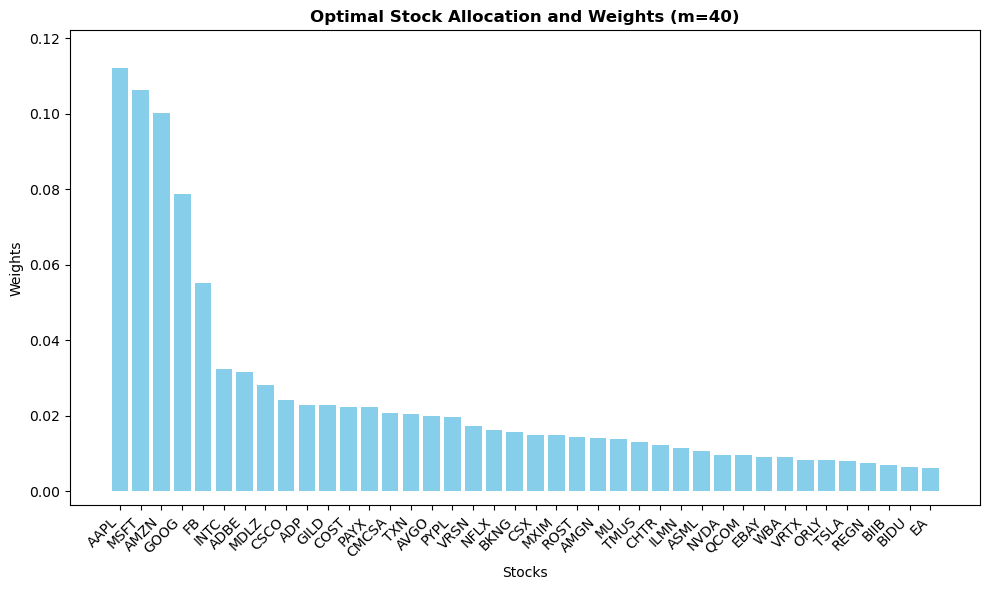

In [16]:
m_value = 40
portfolio_weights = results[m_value]
# Sorting the dictionary based on weights in descending order
sorted_portfolio = {k: v for k, v in sorted(portfolio_weights.items(), key=lambda item: item[1], reverse=True)}
stocks = list(sorted_portfolio.keys())
weights = list(sorted_portfolio.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(stocks, weights, color='skyblue')

plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Optimal Stock Allocation and Weights (m=40)',weight='bold')

# Adjusting y-axis limits for better visibility
plt.ylim(min(weights) - 0.01, max(weights) + 0.01)

# Removing text annotations for weights

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"><span style="font-size: 15px;"> 

<strong>The above code takes ~10 hours to run so we will conduct our subsequent analysis using the csv files we exported in the last step</strong><br>
    


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the CSV files
weights_df = pd.read_csv("weights_by_MIP_new.csv", index_col=0)
tracking_errors_df = pd.read_csv("tracking_errors_by_MIP_new.csv", index_col=0)
selected_stocks_df = pd.read_csv("selected_stocks_by_MIP_new.csv", index_col=0)

# Define ANSI escape codes for text styling
bold = "\033[1m"
reset = "\033[0m"
colors = ["\033[91m", "\033[92m", "\033[93m", "\033[94m", "\033[95m"]

tracking_error_2020_values = []
tracking_error_2019_values = []

for i, m_value in enumerate(values_of_m):
    color = colors[i % len(colors)]  # Cycle through colors for headings

    # Get the data for the current m_value
    chosen_stocks = selected_stocks_df.loc[m_value].dropna().tolist()
    portfolio_weights = weights_df.loc[m_value].to_dict()
    tracking_error_2020 = tracking_errors_df.loc[m_value, '2020']
    tracking_error_2019 = tracking_errors_df.loc[m_value, '2019']

    # Add tracking error values to lists
    tracking_error_2020_values.append(tracking_error_2020)
    tracking_error_2019_values.append(tracking_error_2019)

    # Print the data
    print(f"{bold}{color}Results for m = {m_value}:{reset}\n")
    print(f"{bold}Chosen Stocks:{reset} {chosen_stocks}\n")
    rounded_portfolio_weights = {stock: round(weight, 2) for stock, weight in portfolio_weights.items() if weight != 0}
    print(f"{bold}Portfolio Weights:{reset} {rounded_portfolio_weights}\n")
    print(f"{bold}Tracking Error for 2020:{reset} {round(tracking_error_2020, 2)}\n")
    print(f"{bold}Tracking Error for 2019:{reset} {round(tracking_error_2019, 2)}\n")


Results for m = 5:

Chosen Stocks: ['AMZN', 'ADI', 'AAPL', 'MSFT', 'MDLZ']

Portfolio Weights: {'AMZN': 0.25, 'ADI': 0.11, 'AAPL': 0.19, 'MSFT': 0.29, 'MDLZ': 0.15}

Tracking Error for 2020: 0.78

Tracking Error for 2019: 0.5

Results for m = 10:

Chosen Stocks: ['GOOG', 'AMZN', 'AAPL', 'CTXS', 'FB', 'INTC', 'MSFT', 'PAYX', 'TXN', 'WBA']

Portfolio Weights: {'AMZN': 0.13, 'AAPL': 0.15, 'MSFT': 0.16, 'GOOG': 0.11, 'CTXS': 0.08, 'FB': 0.08, 'INTC': 0.05, 'PAYX': 0.12, 'TXN': 0.1, 'WBA': 0.04}

Tracking Error for 2020: 0.72

Tracking Error for 2019: 0.3

Results for m = 20:

Chosen Stocks: ['ADBE', 'GOOGL', 'AMZN', 'AMGN', 'AAPL', 'ADP', 'AVGO', 'CSCO', 'CMCSA', 'EA', 'FB', 'GILD', 'INTC', 'MXIM', 'MU', 'MSFT', 'MDLZ', 'NFLX', 'PCAR', 'PYPL']

Portfolio Weights: {'AMZN': 0.1, 'AAPL': 0.12, 'MSFT': 0.1, 'MDLZ': 0.04, 'FB': 0.05, 'INTC': 0.04, 'ADBE': 0.04, 'GOOGL': 0.09, 'AMGN': 0.02, 'ADP': 0.06, 'AVGO': 0.02, 'CSCO': 0.04, 'CMCSA': 0.04, 'EA': 0.02, 'GILD': 0.05, 'MXIM': 0.04, 'MU': 0.02

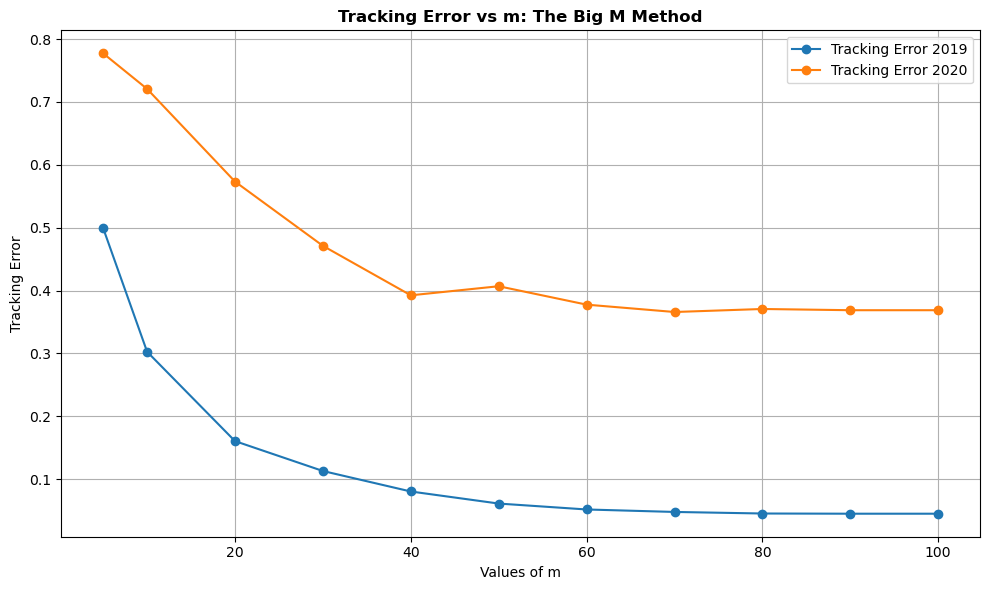

In [18]:
# Plotting tracking errors
plt.figure(figsize=(10, 6))
plt.plot(values_of_m, tracking_error_2019_values, '-o', label='Tracking Error 2019')
plt.plot(values_of_m, tracking_error_2020_values, '-o', label='Tracking Error 2020')
plt.xlabel('Values of m')
plt.ylabel('Tracking Error')
plt.title('Tracking Error vs m: The Big M Method',weight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 5:</strong><br>

<strong>Chosen Stocks:</strong> <br>['AMZN', 'ADI', 'AAPL', 'MSFT', 'MDLZ']
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.25, 'ADI': 0.11, 'AAPL': 0.19, 'MSFT': 0.29, 'MDLZ': 0.15}<br>
 
<strong>Tracking Error for 2020:</strong>0.78<br>

<strong>Tracking Error for 2019:</strong>0.5

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 10:</strong><br>

<strong>Chosen Stocks:</strong> <br>['GOOG', 'AMZN', 'AAPL', 'CTXS', 'FB', 'INTC', 'MSFT', 'PAYX', 'TXN', 'WBA']
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.13, 'AAPL': 0.15, 'MSFT': 0.16, 'GOOG': 0.11, 'CTXS': 0.08, 'FB': 0.08, 'INTC': 0.05, 'PAYX': 0.12, 'TXN': 0.1, 'WBA': 0.04}<br>
 
<strong>Tracking Error for 2020:</strong>0.72<br>

<strong>Tracking Error for 2019:</strong>0.3

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 20:</strong><br>

<strong>Chosen Stocks:</strong>['ADBE', 'GOOGL', 'AMZN', 'AMGN', 'AAPL', 'ADP', 'AVGO', 'CSCO', 'CMCSA', 'EA', 'FB', 'GILD', 'INTC', 'MXIM', 'MU', 'MSFT', 'MDLZ', 'NFLX', 'PCAR', 'PYPL'] <br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'AAPL': 0.12, 'MSFT': 0.1, 'MDLZ': 0.04, 'FB': 0.05, 'INTC': 0.04, 'ADBE': 0.04, 'GOOGL': 0.09, 'AMGN': 0.02, 'ADP': 0.06, 'AVGO': 0.02, 'CSCO': 0.04, 'CMCSA': 0.04, 'EA': 0.02, 'GILD': 0.05, 'MXIM': 0.04, 'MU': 0.02, 'NFLX': 0.02, 'PCAR': 0.04, 'PYPL': 0.04}<br>
 
<strong>Tracking Error for 2020:</strong>0.57<br>

<strong>Tracking Error for 2019:</strong> 0.16

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 30:</strong><br>

<strong>Chosen Stocks:</strong>['ATVI', 'ADBE', 'AMD', 'GOOGL', 'AMZN', 'AMGN', 'ADI', 'AAPL', 'ADP', 'BIIB', 'CSCO', 'CTXS', 'CMCSA', 'CSX', 'FB', 'GILD', 'INTC', 'ISRG', 'KHC', 'MU', 'MSFT', 'MDLZ', 'NFLX', 'NVDA', 'PYPL', 'QCOM', 'SBUX', 'ULTA', 'WBA', 'XLNX'] <br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'ADI': 0.03, 'AAPL': 0.11, 'MSFT': 0.11, 'MDLZ': 0.04, 'CTXS': 0.02, 'FB': 0.05, 'INTC': 0.04, 'WBA': 0.01, 'ADBE': 0.03, 'GOOGL': 0.09, 'AMGN': 0.02, 'ADP': 0.03, 'CSCO': 0.04, 'CMCSA': 0.03, 'GILD': 0.04, 'MU': 0.01, 'NFLX': 0.03, 'PYPL': 0.04, 'ATVI': 0.01, 'AMD': 0.01, 'BIIB': 0.01, 'CSX': 0.01, 'ISRG': 0.02, 'KHC': 0.01, 'NVDA': 0.01, 'QCOM': 0.02, 'SBUX': 0.02, 'ULTA': 0.01, 'XLNX': 0.01}
<br>
 
<strong>Tracking Error for 2020:</strong>0.47 <br>

<strong>Tracking Error for 2019:</strong> 0.11

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 40:</strong><br>

<strong>Chosen Stocks:</strong>['ADBE', 'GOOG', 'AMZN', 'AMGN', 'AAPL', 'ASML', 'ADP', 'BIDU', 'BIIB', 'BKNG', 'AVGO', 'CHTR', 'CSCO', 'CMCSA', 'COST', 'CSX', 'EBAY', 'EA', 'FB', 'GILD', 'ILMN', 'INTC', 'MXIM', 'MU', 'MSFT', 'MDLZ', 'NFLX', 'NVDA', 'ORLY', 'PAYX', 'PYPL', 'QCOM', 'REGN', 'ROST', 'TMUS', 'TSLA', 'TXN', 'VRSN', 'VRTX', 'WBA']<br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'AAPL': 0.11, 'MSFT': 0.11, 'MDLZ': 0.03, 'GOOG': 0.08, 'FB': 0.06, 'INTC': 0.03, 'PAYX': 0.02, 'TXN': 0.02, 'WBA': 0.01, 'ADBE': 0.03, 'AMGN': 0.01, 'ADP': 0.02, 'AVGO': 0.02, 'CSCO': 0.02, 'CMCSA': 0.02, 'EA': 0.01, 'GILD': 0.02, 'MXIM': 0.01, 'MU': 0.01, 'NFLX': 0.02, 'PYPL': 0.02, 'BIIB': 0.01, 'CSX': 0.01, 'NVDA': 0.01, 'QCOM': 0.01, 'ASML': 0.01, 'BIDU': 0.01, 'BKNG': 0.02, 'CHTR': 0.01, 'COST': 0.02, 'EBAY': 0.01, 'ILMN': 0.01, 'ORLY': 0.01, 'REGN': 0.01, 'ROST': 0.01, 'TMUS': 0.01, 'TSLA': 0.01, 'VRSN': 0.02, 'VRTX': 0.01}<br>
 
<strong>Tracking Error for 2020:</strong> 0.39 <br>

<strong>Tracking Error for 2019:</strong>0.08 

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 50:</strong><br>

<strong>Chosen Stocks:</strong>['ADBE', 'AMD', 'GOOG', 'AMZN', 'AMGN', 'AAPL', 'AMAT', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CHTR', 'CSCO', 'CTXS', 'CMCSA', 'COST', 'CSX', 'DLTR', 'EA', 'FB', 'GILD', 'ILMN', 'INTC', 'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LULU', 'MAR', 'MCHP', 'MU', 'MSFT', 'MDLZ', 'NFLX', 'NVDA', 'PAYX', 'PYPL', 'PEP', 'QCOM', 'REGN', 'ROST', 'TMUS', 'TSLA', 'TXN', 'ULTA', 'VRSN', 'WBA'] <br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'AAPL': 0.1, 'MSFT': 0.1, 'MDLZ': 0.02, 'GOOG': 0.08, 'CTXS': 0.02, 'FB': 0.05, 'INTC': 0.03, 'PAYX': 0.02, 'TXN': 0.02, 'WBA': 0.01, 'ADBE': 0.02, 'AMGN': 0.01, 'ADP': 0.02, 'AVGO': 0.02, 'CSCO': 0.02, 'CMCSA': 0.02, 'EA': 0.0, 'GILD': 0.02, 'MU': 0.01, 'NFLX': 0.02, 'PYPL': 0.02, 'AMD': 0.0, 'BIIB': 0.01, 'CSX': 0.01, 'ISRG': 0.01, 'KHC': 0.01, 'NVDA': 0.01, 'QCOM': 0.01, 'ULTA': 0.0, 'BIDU': 0.01, 'BKNG': 0.02, 'CHTR': 0.01, 'COST': 0.02, 'ILMN': 0.01, 'REGN': 0.01, 'ROST': 0.01, 'TMUS': 0.01, 'TSLA': 0.01, 'VRSN': 0.01, 'AMAT': 0.01, 'BMRN': 0.01, 'DLTR': 0.0, 'INTU': 0.01, 'JD': 0.01, 'KLAC': 0.01, 'LULU': 0.0, 'MAR': 0.01, 'MCHP': 0.01, 'PEP': 0.02}<br>
 
<strong>Tracking Error for 2020:</strong> 0.41<br>

<strong>Tracking Error for 2019:</strong> 0.06

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 60:</strong><br>

<strong>Chosen Stocks:</strong>['ADBE', 'AMD', 'GOOGL', 'AMZN', 'AMGN', 'AAPL', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CHTR', 'CSCO', 'CTXS', 'CMCSA', 'COST', 'CSX', 'DLTR', 'EBAY', 'EA', 'FB', 'GILD', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LRCX', 'LULU', 'MAR', 'MXIM', 'MU', 'MSFT', 'MDLZ', 'NTES', 'NFLX', 'NVDA', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'QCOM', 'REGN', 'SIRI', 'SBUX', 'SNPS', 'TMUS', 'TTWO', 'TSLA', 'TXN', 'ULTA', 'VRSN', 'VRTX', 'WBA', 'XLNX'] <br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'AAPL': 0.1, 'MSFT': 0.1, 'MDLZ': 0.01, 'CTXS': 0.01, 'FB': 0.05, 'INTC': 0.03, 'PAYX': 0.01, 'TXN': 0.01, 'WBA': 0.01, 'ADBE': 0.02, 'GOOGL': 0.09, 'AMGN': 0.02, 'ADP': 0.02, 'AVGO': 0.01, 'CSCO': 0.02, 'CMCSA': 0.03, 'EA': 0.0, 'GILD': 0.01, 'MXIM': 0.02, 'MU': 0.01, 'NFLX': 0.02, 'PCAR': 0.01, 'PYPL': 0.02, 'AMD': 0.0, 'BIIB': 0.01, 'CSX': 0.01, 'ISRG': 0.01, 'KHC': 0.0, 'NVDA': 0.01, 'QCOM': 0.01, 'SBUX': 0.01, 'ULTA': 0.01, 'XLNX': 0.01, 'BIDU': 0.01, 'BKNG': 0.01, 'CHTR': 0.01, 'COST': 0.01, 'EBAY': 0.01, 'ILMN': 0.01, 'REGN': 0.01, 'TMUS': 0.01, 'TSLA': 0.0, 'VRSN': 0.01, 'VRTX': 0.01, 'BMRN': 0.0, 'DLTR': 0.01, 'INTU': 0.01, 'JD': 0.0, 'KLAC': 0.01, 'LULU': 0.01, 'MAR': 0.01, 'PEP': 0.02, 'ADSK': 0.0, 'INCY': 0.0, 'LRCX': 0.01, 'NTES': 0.0, 'SIRI': 0.01, 'SNPS': 0.01, 'TTWO': 0.01}<br>
 
<strong>Tracking Error for 2020:</strong>0.38 <br>

<strong>Tracking Error for 2019:</strong> 0.05

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 70:</strong><br>

<strong>Chosen Stocks:</strong> ['ATVI', 'ADBE', 'AMD', 'ALXN', 'GOOGL', 'GOOG', 'AMZN', 'AMGN', 'AAPL', 'AMAT', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CHTR', 'CSCO', 'CTXS', 'CMCSA', 'COST', 'CSX', 'DXCM', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'FAST', 'GILD', 'ILMN', 'INTC', 'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LBTYK', 'LULU', 'MAR', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MDLZ', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PAYX', 'PYPL', 'PEP', 'QCOM', 'REGN', 'ROST', 'SIRI', 'SBUX', 'TMUS', 'TSLA', 'TXN', 'ULTA', 'VRSN', 'VRTX', 'WBA', 'WDAY', 'XLNX']<br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'AAPL': 0.1, 'MSFT': 0.1, 'MDLZ': 0.02, 'GOOG': 0.04, 'CTXS': 0.0, 'FB': 0.05, 'INTC': 0.03, 'PAYX': 0.01, 'TXN': 0.02, 'WBA': 0.01, 'ADBE': 0.02, 'GOOGL': 0.05, 'AMGN': 0.01, 'ADP': 0.02, 'AVGO': 0.01, 'CSCO': 0.03, 'CMCSA': 0.02, 'EA': 0.0, 'GILD': 0.01, 'MXIM': 0.01, 'MU': 0.01, 'NFLX': 0.02, 'PYPL': 0.02, 'ATVI': 0.01, 'AMD': 0.0, 'BIIB': 0.01, 'CSX': 0.01, 'ISRG': 0.01, 'KHC': 0.01, 'NVDA': 0.01, 'QCOM': 0.01, 'SBUX': 0.01, 'ULTA': 0.0, 'XLNX': 0.0, 'BIDU': 0.0, 'BKNG': 0.01, 'CHTR': 0.01, 'COST': 0.01, 'EBAY': 0.01, 'ILMN': 0.01, 'ORLY': 0.01, 'REGN': 0.01, 'ROST': 0.01, 'TMUS': 0.01, 'TSLA': 0.01, 'VRSN': 0.01, 'VRTX': 0.01, 'AMAT': 0.01, 'BMRN': 0.0, 'DLTR': 0.01, 'INTU': 0.01, 'JD': 0.01, 'KLAC': 0.0, 'LULU': 0.0, 'MAR': 0.01, 'MCHP': 0.0, 'PEP': 0.02, 'ADSK': 0.0, 'SIRI': 0.01, 'ALXN': 0.0, 'CDNS': 0.01, 'DXCM': 0.0, 'EXC': 0.01, 'EXPE': 0.0, 'FAST': 0.0, 'LBTYK': 0.0, 'MELI': 0.0, 'NXPI': 0.0, 'WDAY': 0.0}<br>
 
<strong>Tracking Error for 2020:</strong> 0.37 <br>

<strong>Tracking Error for 2019:</strong> 0.05

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 80:</strong><br>

<strong>Chosen Stocks:</strong>['ATVI', 'ADBE', 'AMD', 'ALXN', 'GOOGL', 'GOOG', 'AMZN', 'AMGN', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CHTR', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'COST', 'CSX', 'DXCM', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'FAST', 'FISV', 'GILD', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LRCX', 'LBTYK', 'LULU', 'MAR', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MDLZ', 'NTES', 'NFLX', 'NVDA', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'QCOM', 'REGN', 'ROST', 'SIRI', 'SBUX', 'SNPS', 'TMUS', 'TTWO', 'TSLA', 'TXN', 'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XLNX'] <br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'AAPL': 0.1, 'MSFT': 0.1, 'MDLZ': 0.01, 'GOOG': 0.03, 'CTXS': 0.0, 'FB': 0.05, 'INTC': 0.03, 'PAYX': 0.01, 'TXN': 0.01, 'WBA': 0.01, 'ADBE': 0.02, 'GOOGL': 0.06, 'AMGN': 0.01, 'ADP': 0.01, 'AVGO': 0.01, 'CSCO': 0.03, 'CMCSA': 0.02, 'EA': 0.0, 'GILD': 0.01, 'MXIM': 0.01, 'MU': 0.01, 'NFLX': 0.01, 'PCAR': 0.0, 'PYPL': 0.02, 'ATVI': 0.0, 'AMD': 0.0, 'BIIB': 0.01, 'CSX': 0.01, 'ISRG': 0.01, 'KHC': 0.01, 'NVDA': 0.01, 'QCOM': 0.01, 'SBUX': 0.0, 'ULTA': 0.0, 'XLNX': 0.01, 'ASML': 0.0, 'BIDU': 0.01, 'BKNG': 0.01, 'CHTR': 0.01, 'COST': 0.01, 'EBAY': 0.01, 'ILMN': 0.01, 'ORLY': 0.0, 'REGN': 0.01, 'ROST': 0.01, 'TMUS': 0.01, 'TSLA': 0.01, 'VRSN': 0.01, 'VRTX': 0.01, 'AMAT': 0.0, 'BMRN': 0.0, 'DLTR': 0.01, 'INTU': 0.01, 'JD': 0.0, 'KLAC': 0.0, 'LULU': 0.0, 'MAR': 0.01, 'MCHP': 0.0, 'PEP': 0.02, 'ADSK': 0.0, 'INCY': 0.0, 'LRCX': 0.0, 'NTES': 0.0, 'SIRI': 0.01, 'SNPS': 0.0, 'TTWO': 0.0, 'ALXN': 0.0, 'CDNS': 0.0, 'DXCM': 0.0, 'EXC': 0.0, 'EXPE': 0.0, 'FAST': 0.0, 'LBTYK': 0.0, 'MELI': 0.0, 'WDAY': 0.0, 'CTAS': 0.0, 'CTSH': 0.0, 'FISV': 0.0, 'VRSK': 0.01}<br>
 
<strong>Tracking Error for 2020:</strong> 0.37 <br>

<strong>Tracking Error for 2019:</strong> 0.05

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 90:</strong><br>

<strong>Chosen Stocks:</strong>['ATVI', 'ADBE', 'AMD', 'ALXN', 'GOOGL', 'GOOG', 'AMZN', 'AMGN', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'COST', 'CSX', 'DXCM', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'FAST', 'FISV', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LRCX', 'LBTYA', 'LBTYK', 'LULU', 'MAR', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SIRI', 'SBUX', 'SNPS', 'TMUS', 'TTWO', 'TSLA', 'TXN', 'TCOM', 'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'WDC', 'XEL', 'XLNX'] <br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'AAPL': 0.1, 'MSFT': 0.1, 'MDLZ': 0.01, 'GOOG': 0.03, 'CTXS': 0.0, 'FB': 0.05, 'INTC': 0.03, 'PAYX': 0.01, 'TXN': 0.01, 'WBA': 0.01, 'ADBE': 0.02, 'GOOGL': 0.06, 'AMGN': 0.01, 'ADP': 0.01, 'AVGO': 0.01, 'CSCO': 0.03, 'CMCSA': 0.02, 'EA': 0.0, 'GILD': 0.01, 'MXIM': 0.01, 'MU': 0.01, 'NFLX': 0.02, 'PCAR': 0.0, 'PYPL': 0.02, 'ATVI': 0.0, 'AMD': 0.0, 'BIIB': 0.01, 'CSX': 0.01, 'ISRG': 0.01, 'KHC': 0.01, 'NVDA': 0.01, 'QCOM': 0.01, 'SBUX': 0.01, 'ULTA': 0.0, 'XLNX': 0.01, 'ASML': 0.0, 'BIDU': 0.01, 'BKNG': 0.01, 'CHTR': 0.01, 'COST': 0.01, 'EBAY': 0.01, 'ILMN': 0.01, 'ORLY': 0.0, 'REGN': 0.01, 'ROST': 0.0, 'TMUS': 0.01, 'TSLA': 0.01, 'VRSN': 0.01, 'VRTX': 0.01, 'AMAT': 0.0, 'BMRN': 0.0, 'DLTR': 0.01, 'INTU': 0.01, 'JD': 0.01, 'KLAC': 0.01, 'LULU': 0.0, 'MAR': 0.01, 'MCHP': 0.0, 'PEP': 0.02, 'ADSK': 0.0, 'INCY': 0.0, 'LRCX': 0.0, 'NTES': 0.0, 'SIRI': 0.01, 'SNPS': 0.01, 'TTWO': 0.0, 'ALXN': 0.0, 'CDNS': 0.0, 'DXCM': 0.0, 'EXC': 0.0, 'EXPE': 0.0, 'FAST': 0.0, 'LBTYK': 0.0, 'MELI': 0.0, 'NXPI': 0.0, 'WDAY': 0.0, 'CTAS': 0.0, 'CTSH': 0.0, 'FISV': 0.0, 'VRSK': 0.01, 'CHKP': 0.0, 'IDXX': 0.0, 'MRNA': 0.0, 'MNST': 0.0, 'PDD': 0.0, 'TCOM': 0.0, 'XEL': 0.0}
<br>
 
<strong>Tracking Error for 2020:</strong> 0.37 <br>

<strong>Tracking Error for 2019:</strong> 0.04

<div class="alert alert-block alert-success"><span style="font-size: 16px;">

<strong>Results for m = 100:</strong><br>

<strong>Chosen Stocks:</strong>['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'FAST', 'FISV', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LRCX', 'LBTYA', 'LBTYK', 'LULU', 'MAR', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TTWO', 'TSLA', 'TXN', 'TCOM', 'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'WDC', 'XEL', 'XLNX'] <br>
    
<strong>Portfolio Weights:</strong>{'AMZN': 0.1, 'AAPL': 0.1, 'MSFT': 0.1, 'MDLZ': 0.01, 'GOOG': 0.03, 'CTXS': 0.0, 'FB': 0.05, 'INTC': 0.03, 'PAYX': 0.01, 'TXN': 0.01, 'WBA': 0.01, 'ADBE': 0.02, 'GOOGL': 0.06, 'AMGN': 0.01, 'ADP': 0.01, 'AVGO': 0.01, 'CSCO': 0.03, 'CMCSA': 0.02, 'EA': 0.0, 'GILD': 0.01, 'MXIM': 0.01, 'MU': 0.01, 'NFLX': 0.02, 'PCAR': 0.0, 'PYPL': 0.02, 'ATVI': 0.0, 'AMD': 0.0, 'BIIB': 0.01, 'CSX': 0.01, 'ISRG': 0.01, 'KHC': 0.01, 'NVDA': 0.01, 'QCOM': 0.01, 'SBUX': 0.01, 'ULTA': 0.0, 'XLNX': 0.01, 'ASML': 0.0, 'BIDU': 0.01, 'BKNG': 0.01, 'CHTR': 0.01, 'COST': 0.01, 'EBAY': 0.01, 'ILMN': 0.01, 'ORLY': 0.0, 'REGN': 0.01, 'ROST': 0.0, 'TMUS': 0.01, 'TSLA': 0.01, 'VRSN': 0.01, 'VRTX': 0.01, 'AMAT': 0.0, 'BMRN': 0.0, 'DLTR': 0.01, 'INTU': 0.01, 'JD': 0.01, 'KLAC': 0.01, 'LULU': 0.0, 'MAR': 0.01, 'MCHP': 0.0, 'PEP': 0.02, 'ADSK': 0.0, 'INCY': 0.0, 'LRCX': 0.0, 'NTES': 0.0, 'SIRI': 0.01, 'SNPS': 0.01, 'TTWO': 0.0, 'ALXN': 0.0, 'CDNS': 0.0, 'DXCM': 0.0, 'EXC': 0.0, 'EXPE': 0.0, 'FAST': 0.0, 'LBTYK': 0.0, 'MELI': 0.0, 'NXPI': 0.0, 'WDAY': 0.0, 'CTAS': 0.0, 'CTSH': 0.0, 'FISV': 0.0, 'VRSK': 0.01, 'CHKP': 0.0, 'IDXX': 0.0, 'MRNA': 0.0, 'MNST': 0.0, 'PDD': 0.0, 'TCOM': 0.0, 'XEL': 0.0}<br>
 
<strong>Tracking Error for 2020:</strong> 0.37 <br>

<strong>Tracking Error for 2019:</strong> 0.04